### Copyright 2022 Edward Späth, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md

## Tower of Hanoi problem

## Global variables for storing information

In [1]:
# For comfortably referring to the individual rods by being able to use their name instead of their index in rods
A, B, C = 0, 1, 2
amt_discs = 5
rod_states = []
changes = []
rods = [[], [], []]

## Algorithm to solve the Tower of Hanoi problem

In [2]:
from copy import deepcopy
def hanoi(i, from_rod, to_rod, help_rod):
    global rods, changes, rod_states
    if i > 0:
        # First recursive call
        hanoi(i-1, from_rod, help_rod, to_rod)
        # Actually move the disc from one rod to another
        element_to_be_moved = rods[from_rod][-1]
        rods[from_rod] = rods[from_rod][:-1]
        rods[to_rod].append(element_to_be_moved)
        # Write down information about operation
        changes.append((from_rod, to_rod, i)) # Where it came from, where it went, what it was
        rod_states.append(deepcopy(rods))
        # Second recursive call
        hanoi(i-1, help_rod, to_rod, from_rod)

## Function to place the discs at the start

In [3]:
def put_discs_on_starting_rod(starting_rod):
    global rods, changes, rod_states
    rods[starting_rod] = list(reversed(range(1, amt_discs+1)))
    # I want rod_states and changes to refer to the same image if they have the same index.
    # The first and last images have no changes since they only show the intial state or the result
    # To circumvent this issue, both at the beginning and at the end of changes, a nonsensical entry is added in order to make the indices line up.
    # Nonsensical means that Something was allegedly moved from one rod back to the same rod. This can then be caught and interpreted as "Do not draw an arrow, since no operation occured" 
    changes.append((A, A, 1))
    rod_states.append(deepcopy(rods))

## Function to set the colors to one of the 4 options, which the user has chosen

In [4]:
import random
def color_setter():
    colors = []
    # Color option 1
    if COLOR_OPTION_CHOICE == 1:
        colors = [COL_OPTION_1] * amt_discs
    # Color option 2
    elif COLOR_OPTION_CHOICE == 2:
        # Generates three random values from 0 to 1, which represent the RGB values
        random_rgb_value = [random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)]
        colors = [[random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)]] * amt_discs
    # Color option 3
    elif COLOR_OPTION_CHOICE == 3:
        colors = COLS_OPTION_3
        while len(colors) < amt_discs:
            colors.append([random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)])
    # Color option 4 (or when user inputs anything other than 1,2,3,4)
    else:
        while len(colors) < amt_discs:
            colors.append([random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)])
    return colors

## Function to calculate how long each square should be

In [5]:
def calculate_lengths():
    lengths = []
    difference = DISC_MAX_LENGTH/amt_discs
    for i in range(amt_discs):
        lengths.append(DISC_MAX_LENGTH - i*difference)
    lengths.reverse()
    return lengths

## Constants for the visualization

In [6]:
DESIRED_SIZE_X = 14
DESIRED_SIZE_Y = 14
ROD_NAMES = ['A', 'B', 'C']
ROD_X_CORDS = [-4, 0, 4]
DISC_MAX_LENGTH = 4
DISC_LENGTHS = []
DISC_HEIGHT = 0.5
LOWEST_DISC_Y_CORD = 1
COLORS = []
# ARM_LENGTH refers to the length of the vertical parts of the arrow. 100 seems good to me.
ARM_LENGTH = 100
DISC_EDGE_COLOR = 'black'
DISC_EDGE_LINEWIDTH = 1 # The linewidth of the (by default) black outline around the rectangles

## Visualization

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def visualize(step):
    fig, ax = plt.subplots()
    fig.set_size_inches(DESIRED_SIZE_X, DESIRED_SIZE_Y)
    ax.axis([-6, 6, -1, 1+(amt_discs*DISC_HEIGHT)+1]) # xmin, xmax, ymin, ymax
    ax.axis('off')
    # Draw label of image
    if step == 0:
        image_label = 'Start'
    elif step+1 == len(rod_states):
        image_label = 'Result'
    else:
        # Subtract 2 of the rod_states, since The first and last image are not considered steps, since nothing happens
        image_label = 'Step ' + str(step) + '/' + str(len(rod_states)-2)
    plt.text(x=0, y=1+amt_discs*DISC_HEIGHT+0.5, s=image_label, fontsize=20, verticalalignment='center', horizontalalignment='center')
    for k in range(3):
        plt.text(x=ROD_X_CORDS[k], y=1-DISC_HEIGHT, s=ROD_NAMES[k], fontsize=16, verticalalignment='center', horizontalalignment='center')
    # Draw Contents of Rod A
    for position, size in enumerate(rod_states[step][A]):
        # Since you have to specifiy the coordinates of a corner, width and length in order to draw the rectangle, the leftmost corner can be calculated by taking the center 
        # and subtracting (shifting to the left) by half of the disc's total length. Analogous for drawing Contents of Rod B and C
        rect = plt.Rectangle((ROD_X_CORDS[A]-DISC_LENGTHS[size-1]/2, (DISC_HEIGHT*position)+LOWEST_DISC_Y_CORD), DISC_LENGTHS[size-1], DISC_HEIGHT, facecolor=COLORS[size-1],
                             edgecolor=DISC_EDGE_COLOR, linewidth=DISC_EDGE_LINEWIDTH, alpha=1)
        ax.add_patch(rect)
    # Draw Contents of Rod B
    for position, size in enumerate(rod_states[step][B]):
        rect = plt.Rectangle((ROD_X_CORDS[B]-DISC_LENGTHS[size-1]/2, (DISC_HEIGHT*position)+LOWEST_DISC_Y_CORD), DISC_LENGTHS[size-1], DISC_HEIGHT, facecolor=COLORS[size-1],
                             edgecolor=DISC_EDGE_COLOR, linewidth=DISC_EDGE_LINEWIDTH, alpha=1)
        ax.add_patch(rect)
    # Draw Contents of Rod C
    for position, size in enumerate(rod_states[step][C]):
        rect = plt.Rectangle((ROD_X_CORDS[C]-DISC_LENGTHS[size-1]/2, (DISC_HEIGHT*position)+LOWEST_DISC_Y_CORD), DISC_LENGTHS[size-1], DISC_HEIGHT, facecolor=COLORS[size-1],
                             edgecolor=DISC_EDGE_COLOR, linewidth=DISC_EDGE_LINEWIDTH, alpha=1)
        ax.add_patch(rect)
    # If a change has happened in this step (true for all images except for the first one and last one), then display an arrow indicating from where to where a disc was moved
    # Additionally draw a pale version of the moved disc at the spot where it was before. This pale disc is further reffered to as ghost_disc
    # This if-check identifies the 2 images which show the initial state or the result and therefore does neither draw an arrow nor a ghost_disc in that case
    if changes[step][0] != changes[step][1]:
        source_rod = changes[step][0]
        destination_rod = changes[step][1]
        # armA/armB reffers to the length of the lines where the arrow is going downwards
        # Since we want those lines to go downwards no matter the direction of the arrow, the length has to be inverted, when the arrow is facing from right to left
        # If arrow goes from left to right
        if source_rod < destination_rod:
            correct_armA = ARM_LENGTH
            correct_armB = ARM_LENGTH
        # If arrow goes from right to left, then invert the lengths
        else:
            correct_armA = -ARM_LENGTH
            correct_armB = -ARM_LENGTH
        # If someone wants to change the arrow, here is the link to the documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html
        arrow = mpatches.FancyArrowPatch((ROD_X_CORDS[source_rod], 0), (ROD_X_CORDS[destination_rod], 0), mutation_scale=100, 
                                         arrowstyle=mpatches.ArrowStyle('->', head_length=0.3, head_width=0.2), linestyle='-', linewidth=3,
                                         connectionstyle=mpatches.ConnectionStyle('bar', armA=correct_armA, armB=correct_armB, fraction=0))
        ax.add_patch(arrow)
        # The ghost disc has to have been the uppermost disc of the source rod during the previous step
        ghost_disc_size = rod_states[step-1][source_rod][-1]
        # The discs start at y=LOWEST_DISC_Y_CORD and you have to subtract 1 from the amount of discs on the source rod during the previous step, 
        # since otherwise you would also count the ghost disc itself, which is not there any longer
        # The paleness of the ghost disc is achieved by changing its alpha-value from 1 to 0.1
        ghost_disc_y_cord = LOWEST_DISC_Y_CORD + DISC_HEIGHT*(len(rod_states[step-1][source_rod])-1)
        ghost_disc = plt.Rectangle((ROD_X_CORDS[source_rod]-DISC_LENGTHS[ghost_disc_size-1]/2, ghost_disc_y_cord), DISC_LENGTHS[ghost_disc_size-1], DISC_HEIGHT, 
                                    facecolor=COLORS[ghost_disc_size-1], edgecolor=DISC_EDGE_COLOR, linewidth=DISC_EDGE_LINEWIDTH, alpha=0.1)
        ax.add_patch(ghost_disc)
    plt.show()

## Function to call algorithm and display result

In [8]:
def call_algorithm(rod_roles):
    global DISC_LENGTHS, COLORS
    # Make sure that all the rods were given in rod_roles
    if A not in rod_roles or B not in rod_roles or C not in rod_roles or len(rod_roles) != 3:
        print("Make sure that you have given the correct rod names in rod_order")
        return
    # Calculate how long each disc is
    DISC_LENGTHS = calculate_lengths()
    # Assign colors to the discs
    COLORS = color_setter()
    put_discs_on_starting_rod(rod_roles[0])
    hanoi(amt_discs, rod_roles[0], rod_roles[1], rod_roles[2])
    # So that result can be displayed
    changes.append((A, A, 1))
    rod_states.append(deepcopy(rods))
    for i in range(0, len(rod_states)):
        visualize(i)

## Function to clear the results

In [9]:
def clear_results():
    global rod_states, changes, rods
    rod_states = []
    changes = []
    rods = [[], [], []]

## Example

In [10]:
# There are four options for colors.
# Option 1: All discs have the same specified color, which can be customized
# Option 2: All discs have the same color, which is chosen at random
# Option 3: Every disc has its own specified color, which can be customized
# Option 4: Every disc has its own color, which are chosen at random
# Set the value of this variable to the number of the method, which you want to use (1/2/3/4)
COLOR_OPTION_CHOICE = 4

# Color in case you have chosen option 1:
# Default is: 'green'
COL_OPTION_1 = 'green'

# Colors n case you have chosen option 3: 
# If not enough colors are given, then the missing ones will be generated randomly.
# The color at the first index is assigned to the smallest disc. The color of the second index is assigned to the second smallest disc, etc.
# Defaults are: 'red', 'blue', 'forestgreen', 'violet', 'gold', 'cyan', 'peru'
COLS_OPTION_3 = ['red', 'blue', 'forestgreen', 'violet', 'gold', 'cyan', 'peru']

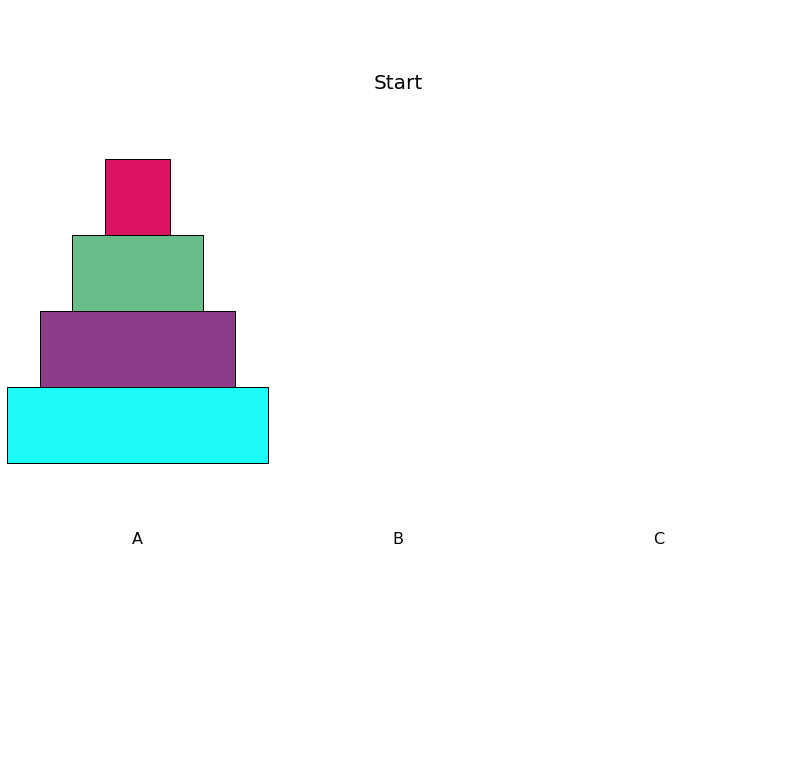

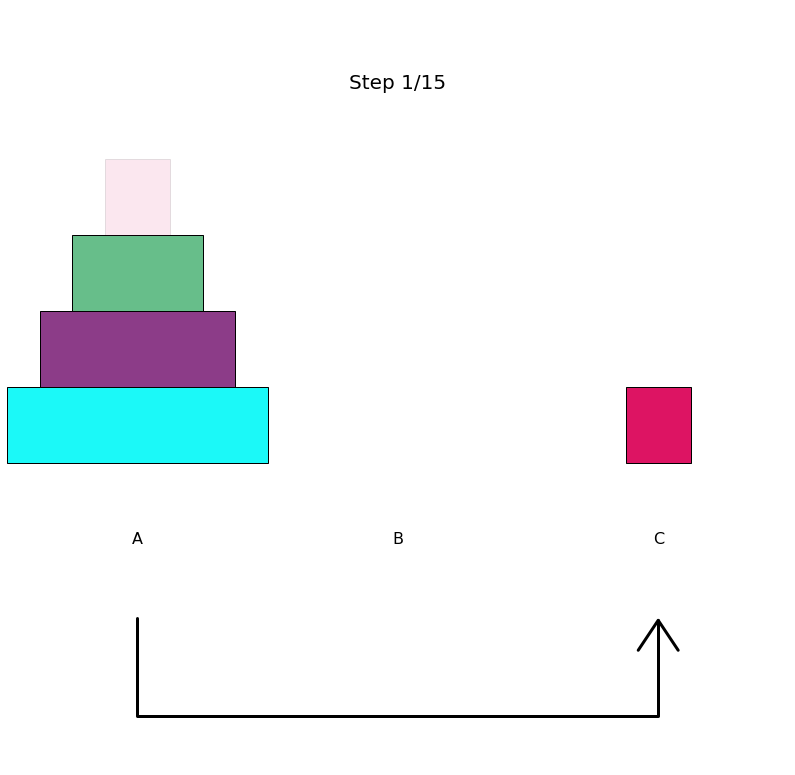

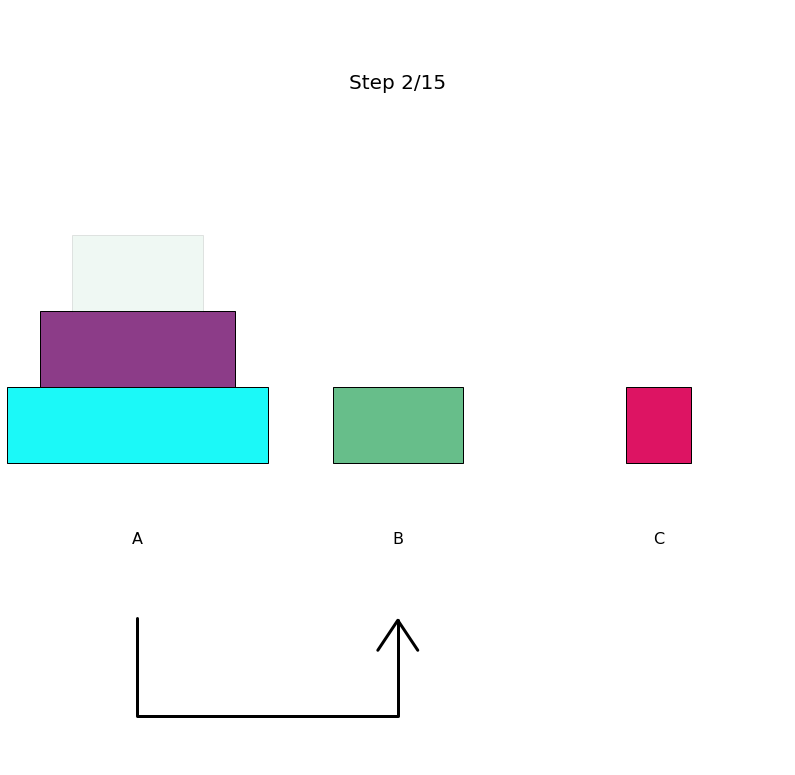

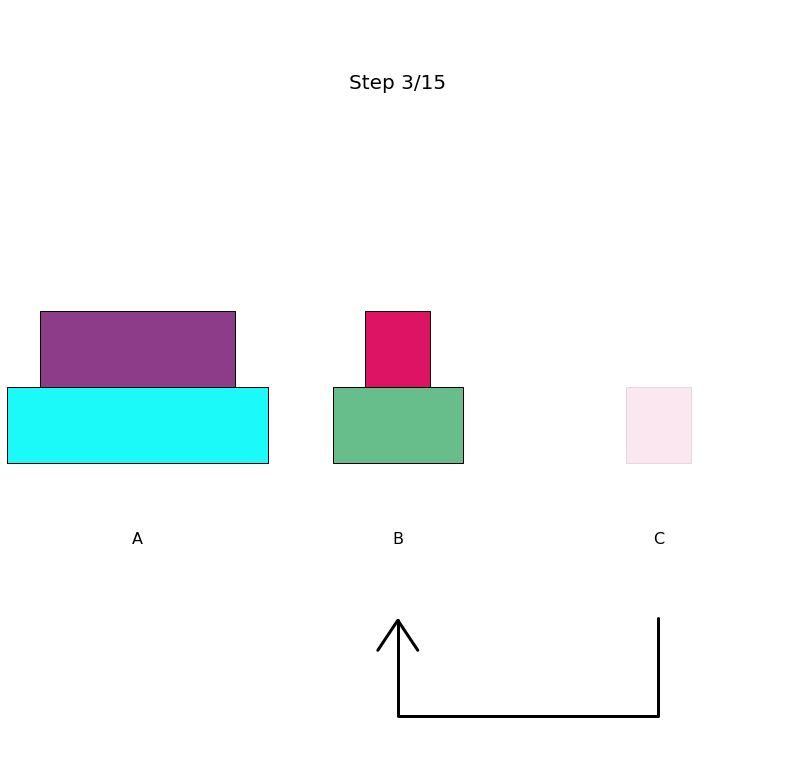

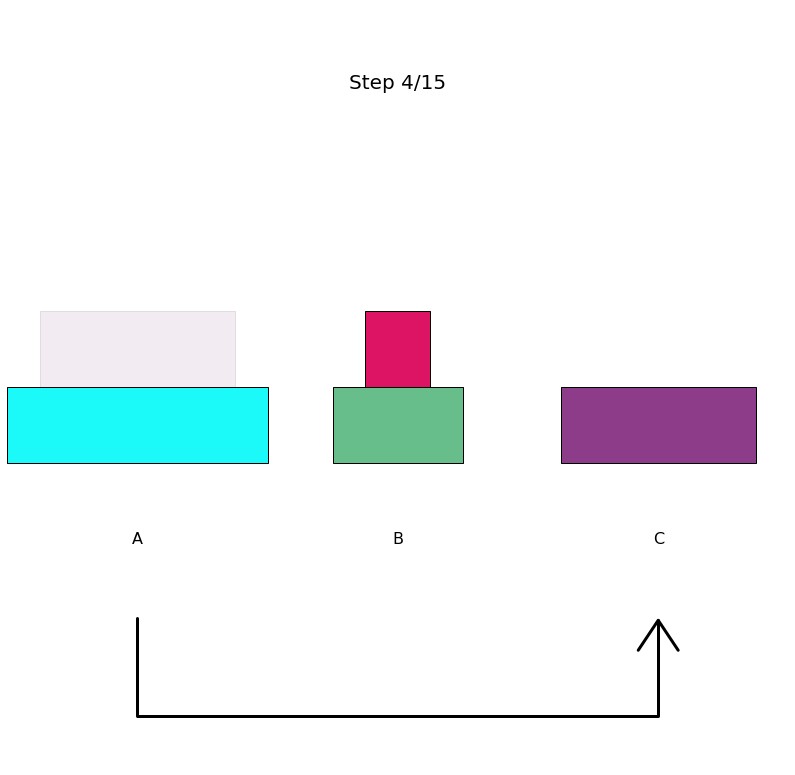

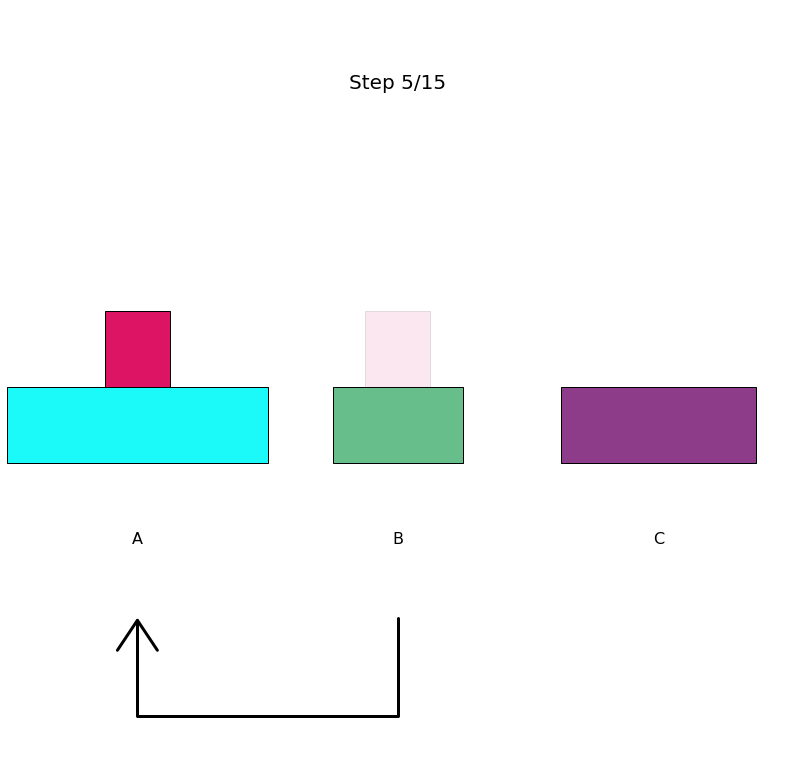

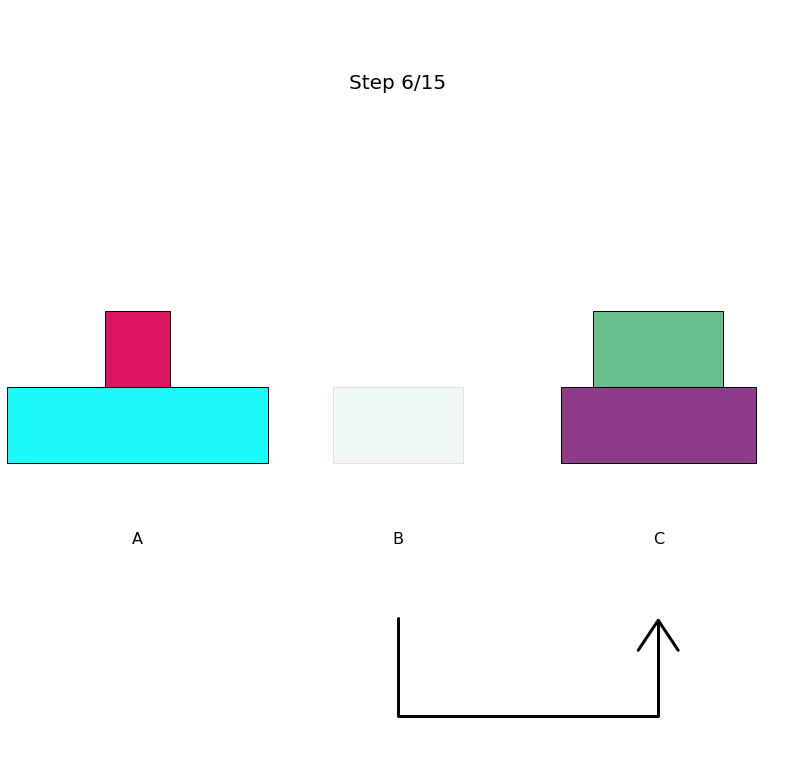

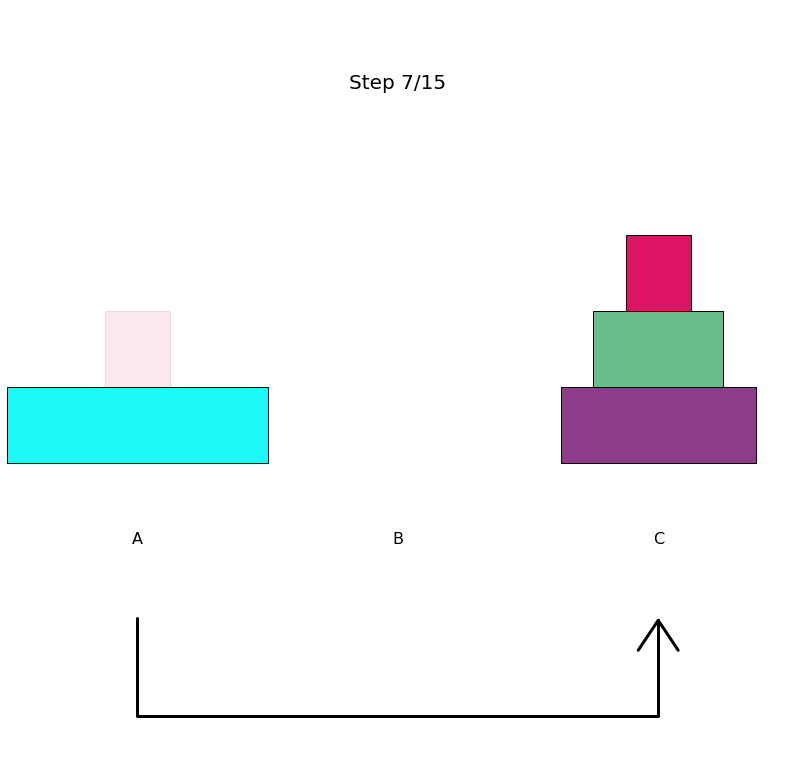

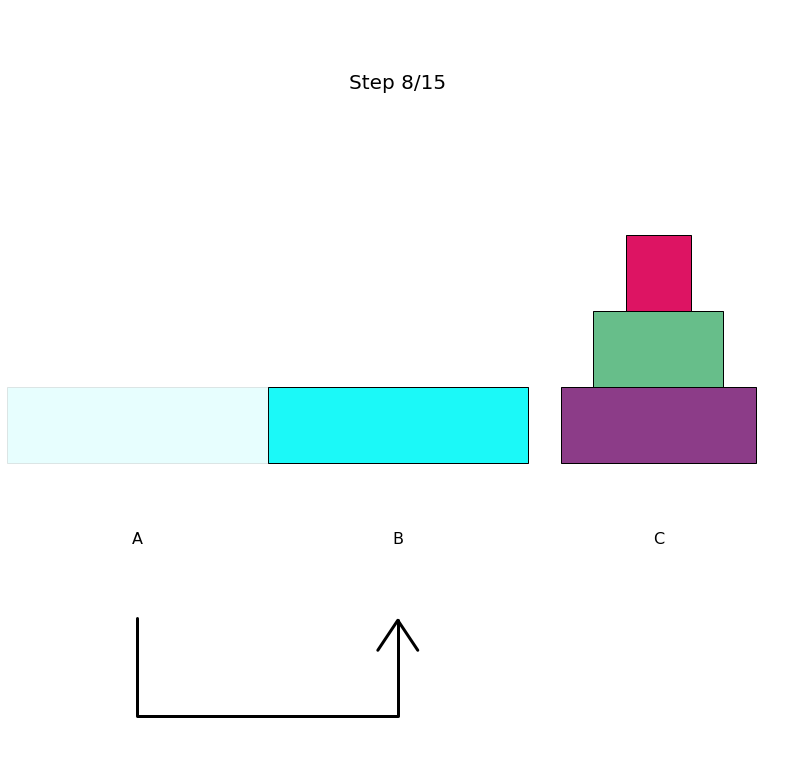

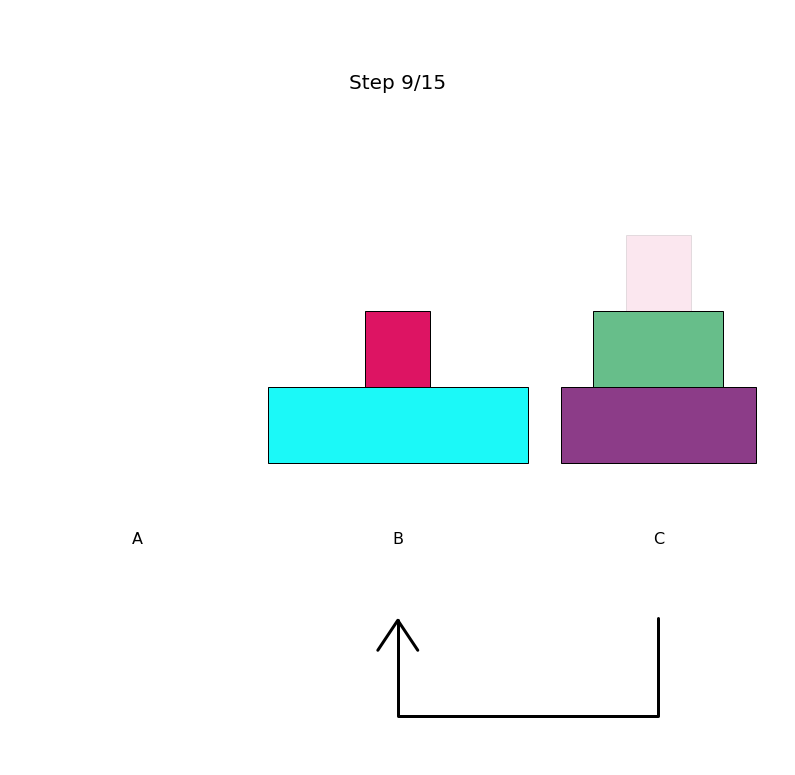

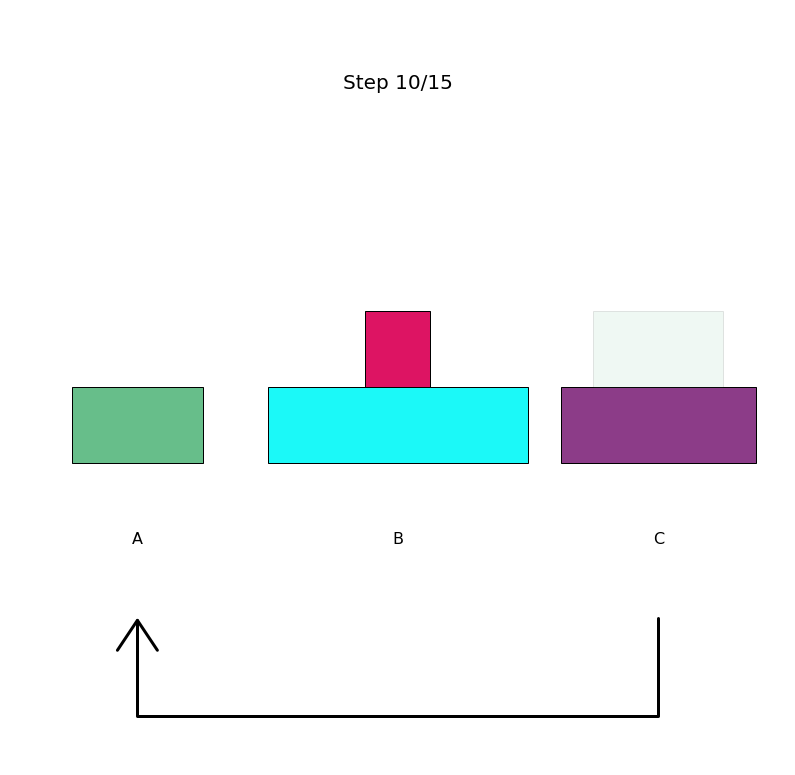

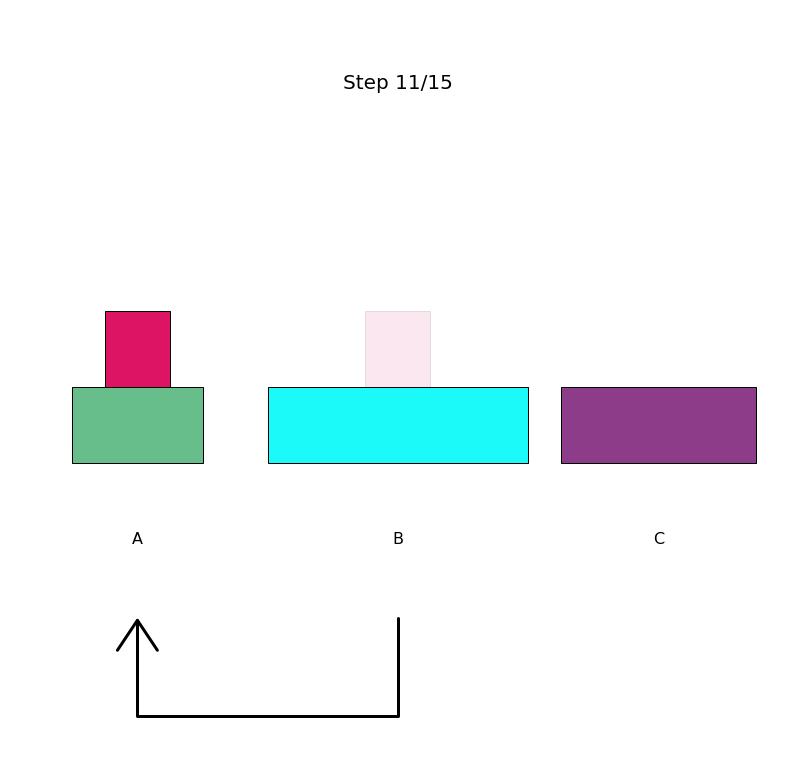

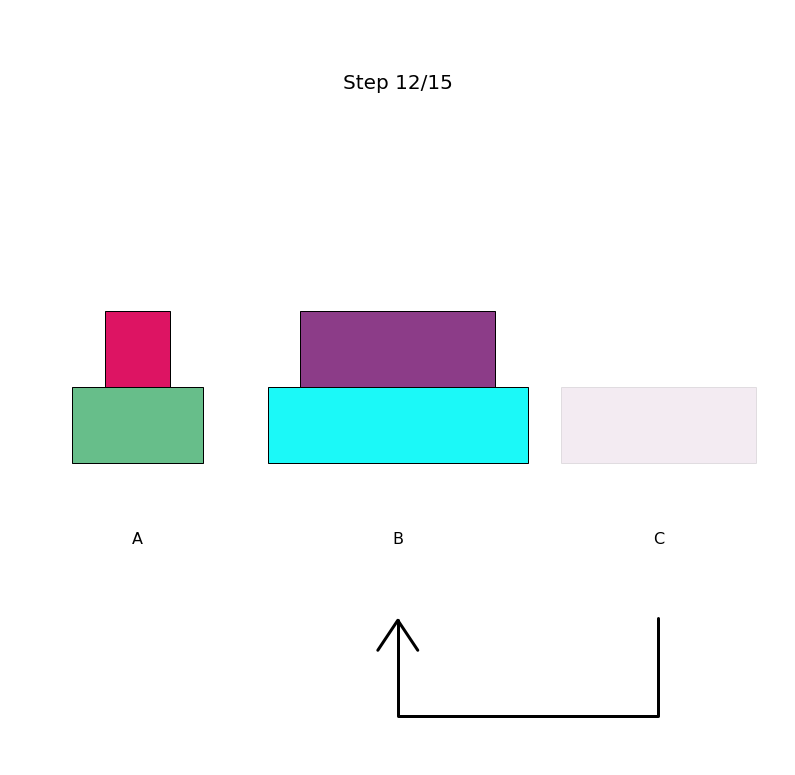

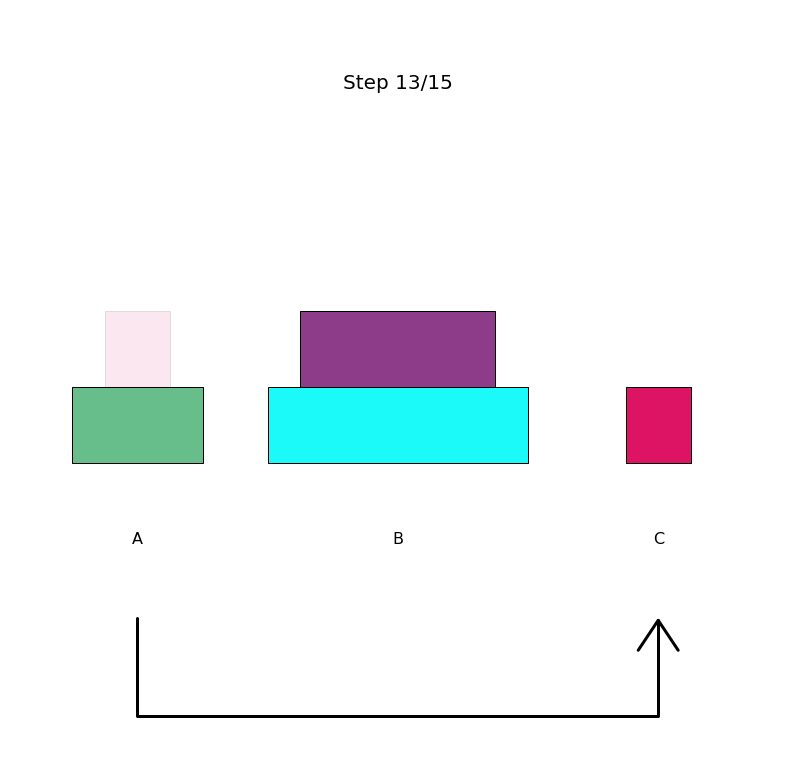

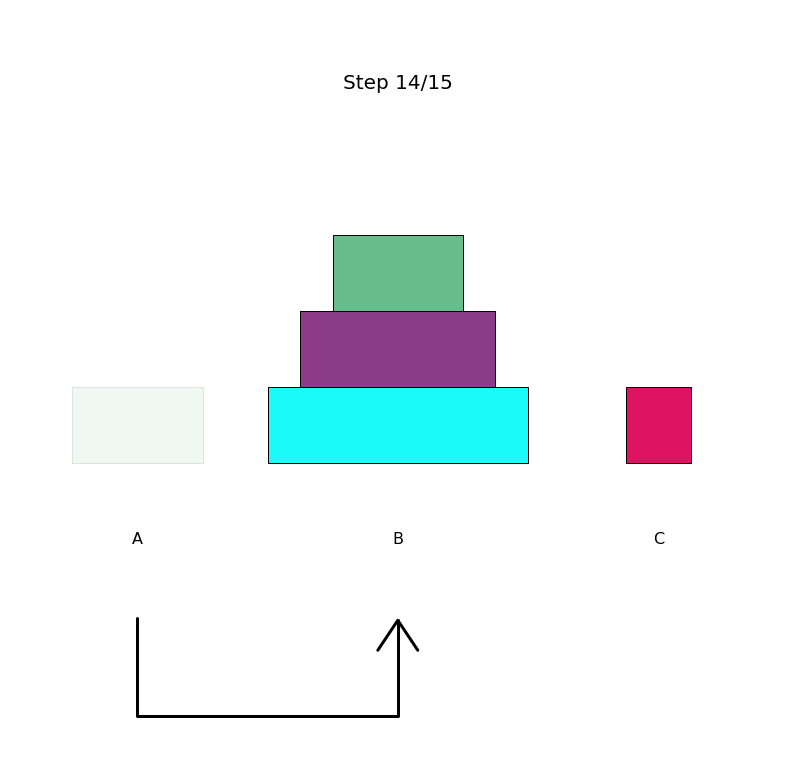

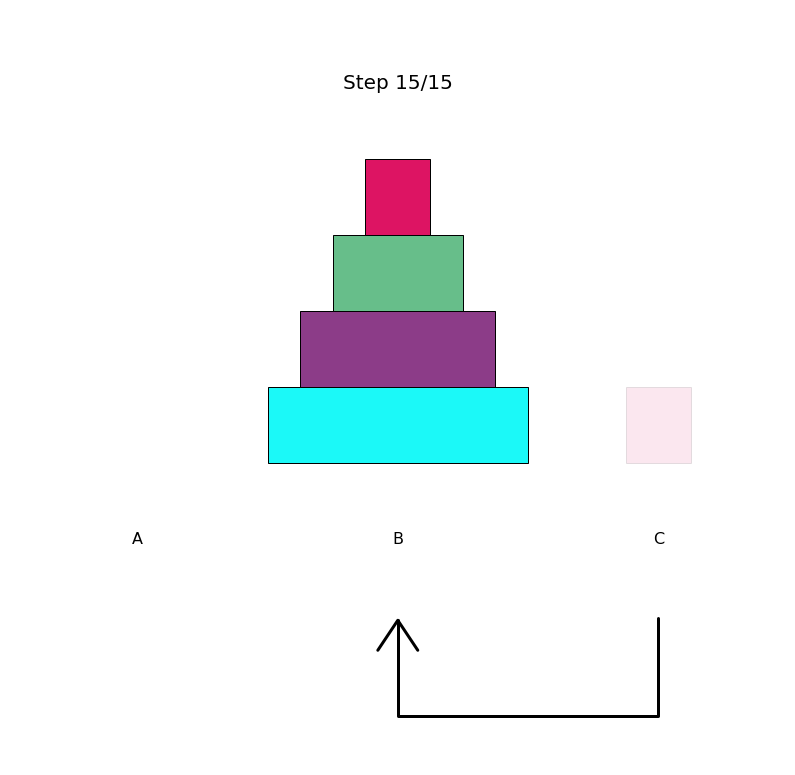

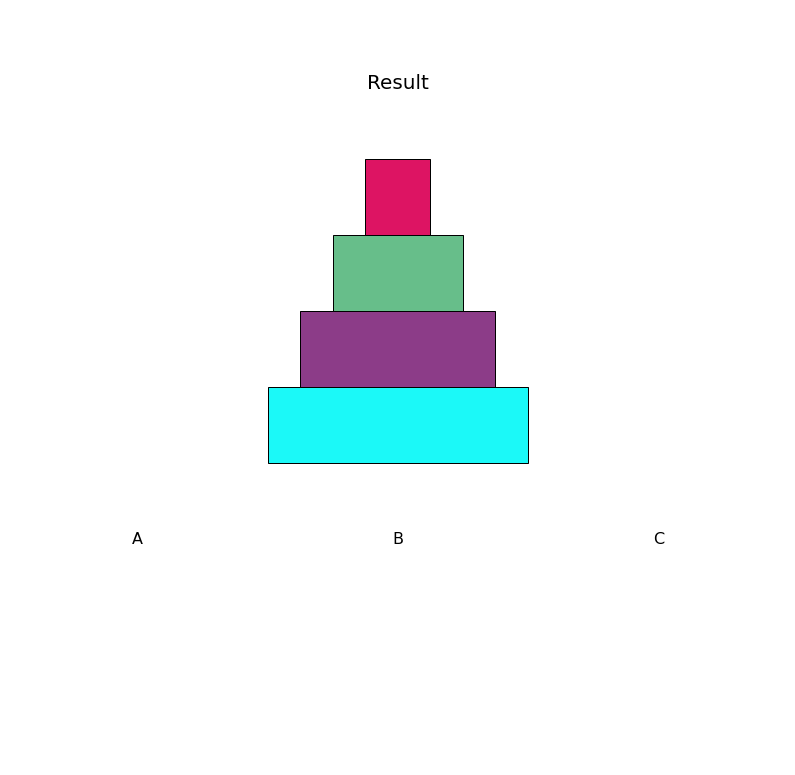

In [11]:
# Set the amount of discs. I recommend to NOT use more than 8 discs. The amount of required moves is calculated by the formula: |moves| = 2^(amt_discs) - 1. 
# For 8 discs this would be 255 moves required to solve the tower. For 9 discs this would almost double the number to 511, then 1023 moves for 10 discs, etc.
amt_discs = 4
# The rod_roles specifies which of the 3 rods is the start, the destination and the helping rod.
# Enter the rods (without 'ticks'!) in the order determined by putting them into the sentence below
# Move the discs from rod A to rod B, using rod C as help --> rod_order = [A, B, C]
rod_roles = [A, B, C]
call_algorithm(rod_roles)
clear_results()

## Yet another example

In [12]:
COLOR_OPTION_CHOICE = 3
COL_OPTION_1 = 'green'
COLS_OPTION_3 = ['red', 'blue', 'forestgreen', 'violet', 'gold', 'cyan', 'peru']

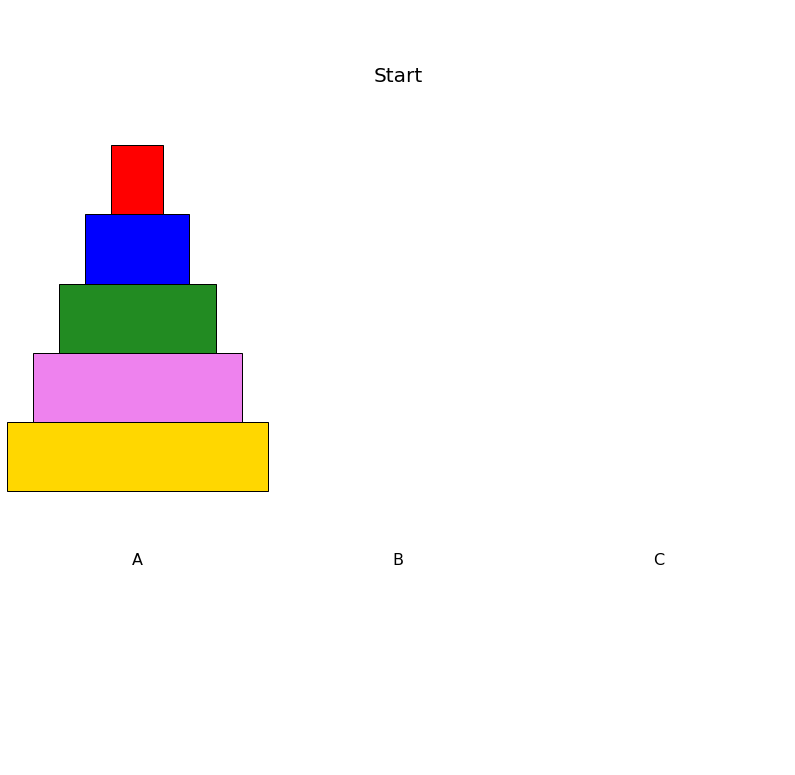

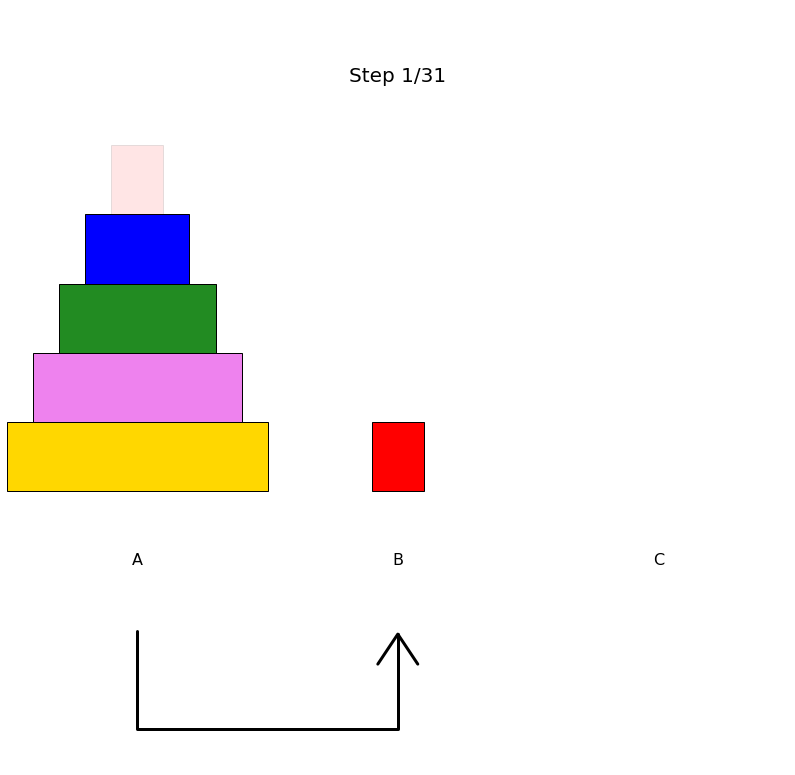

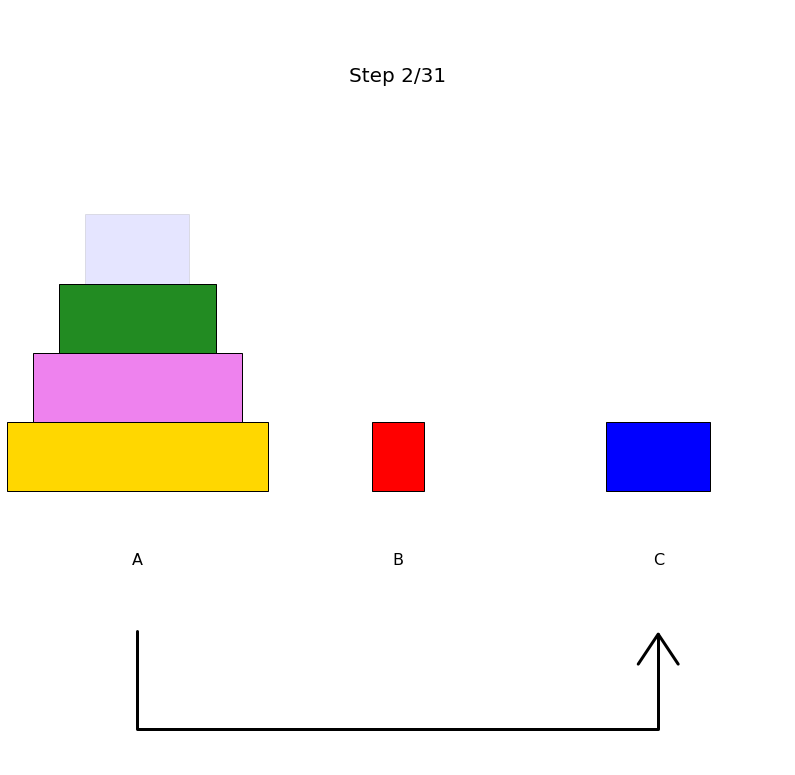

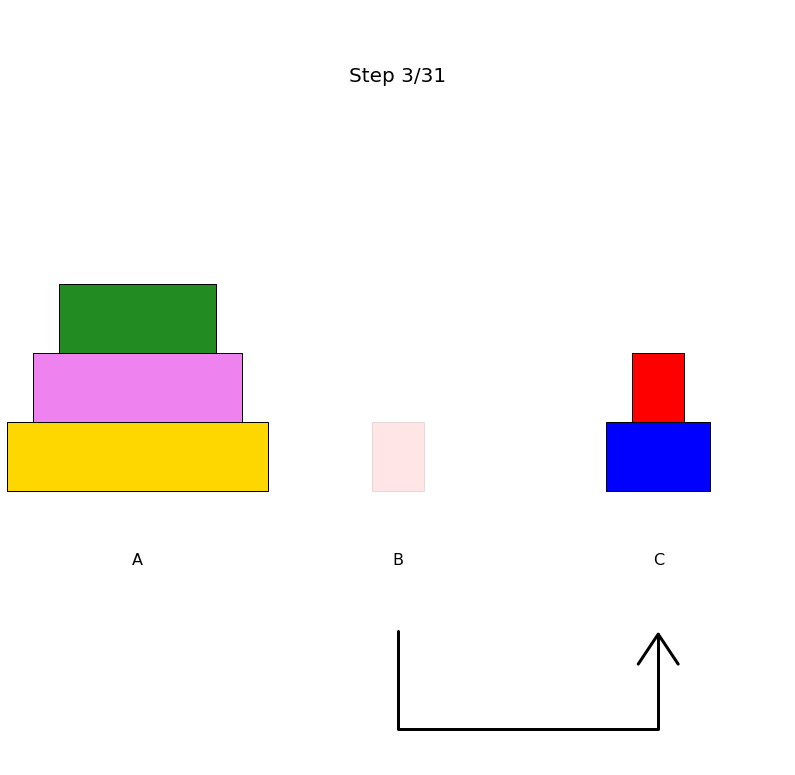

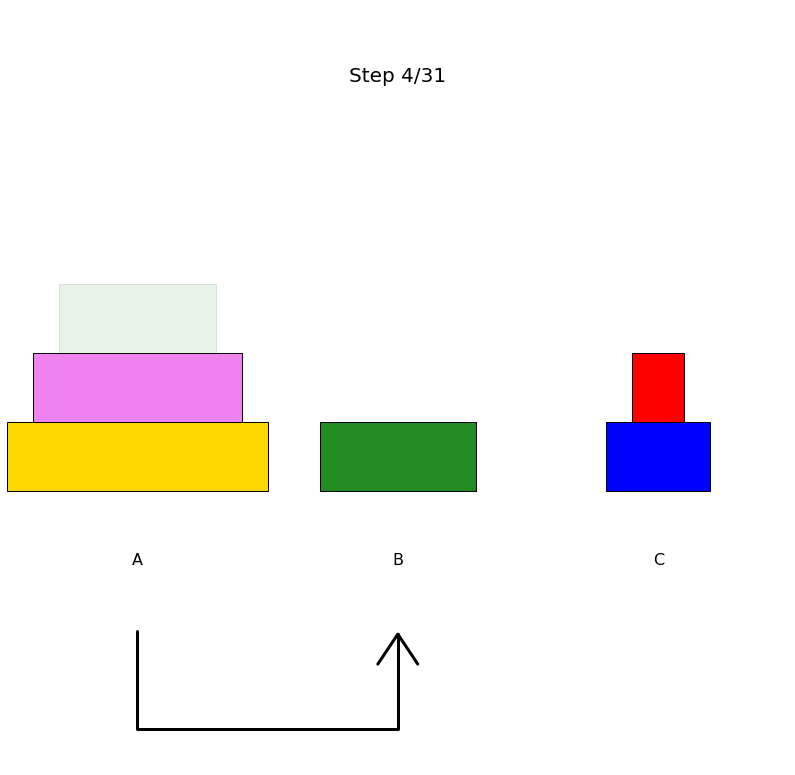

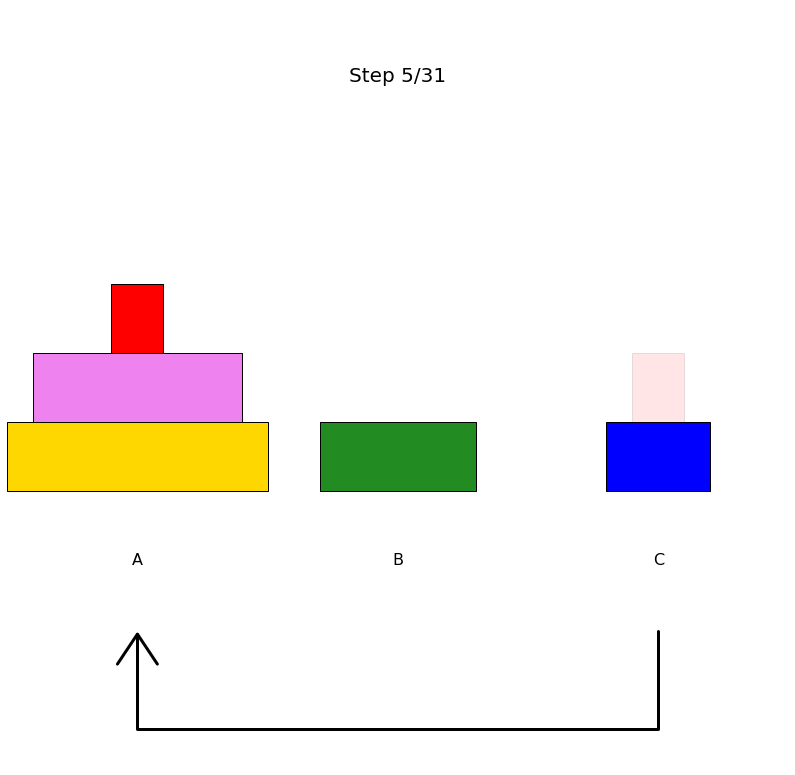

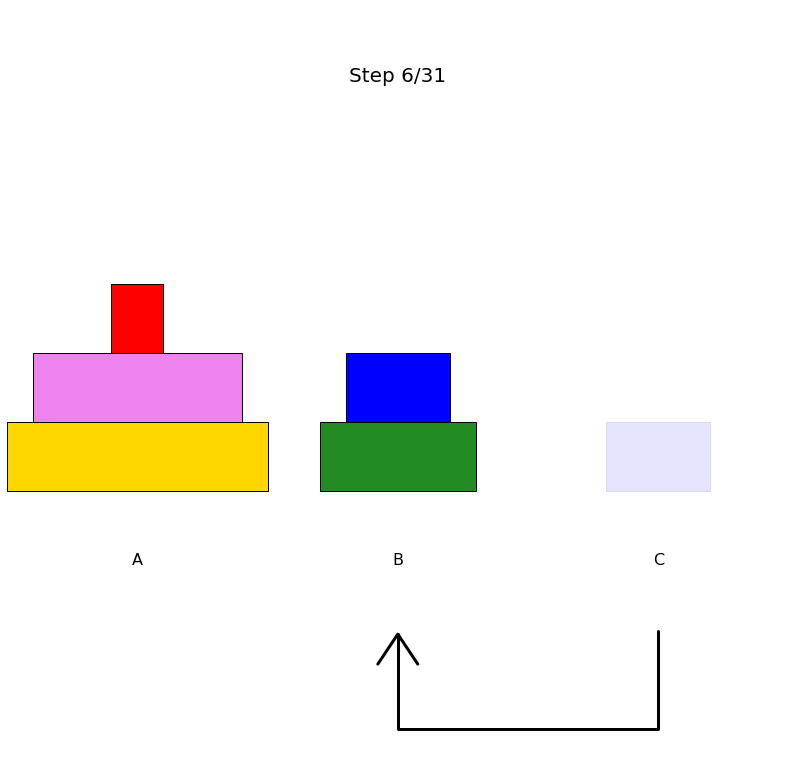

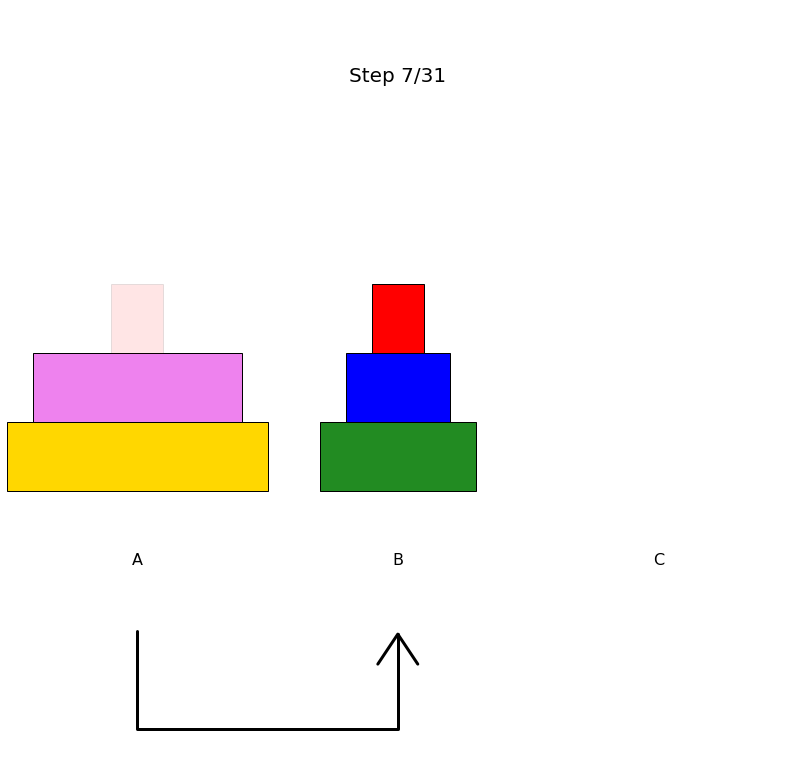

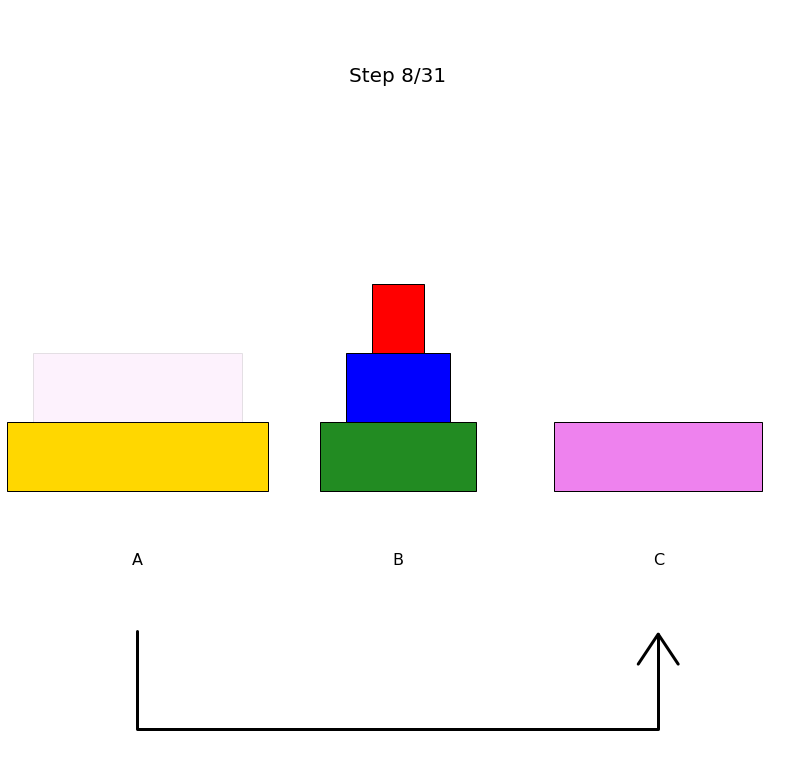

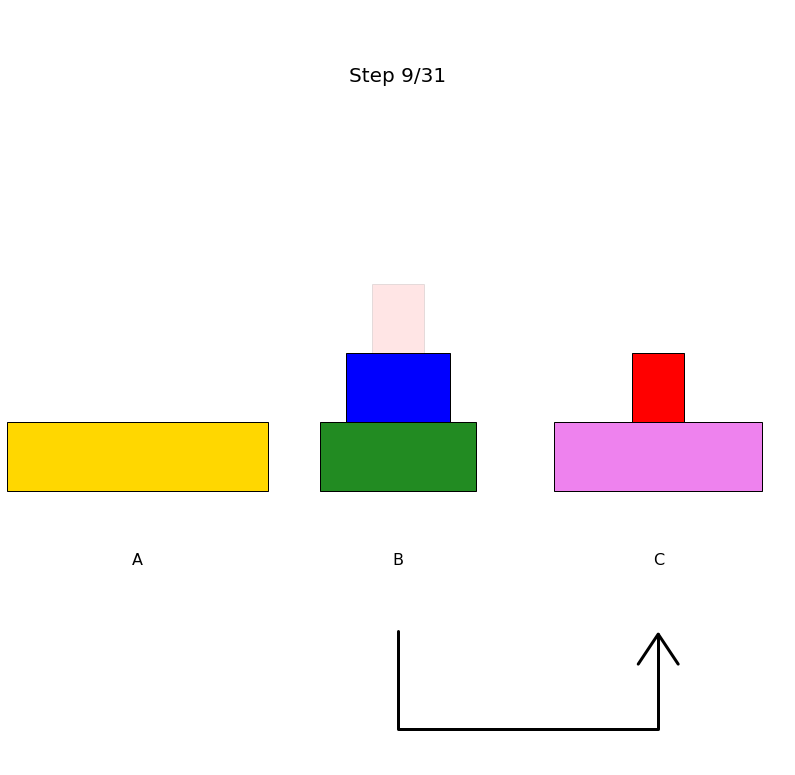

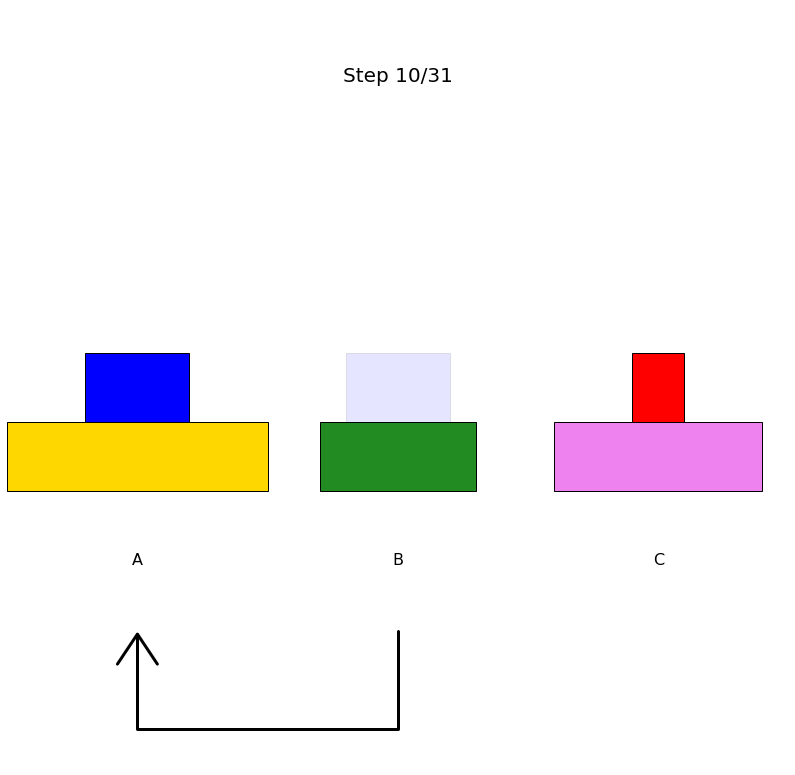

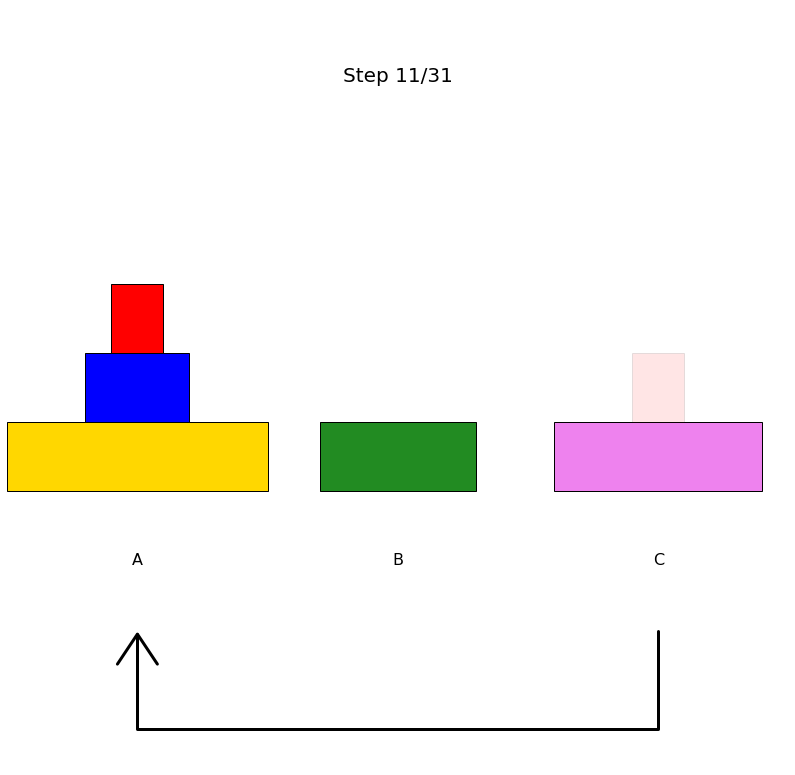

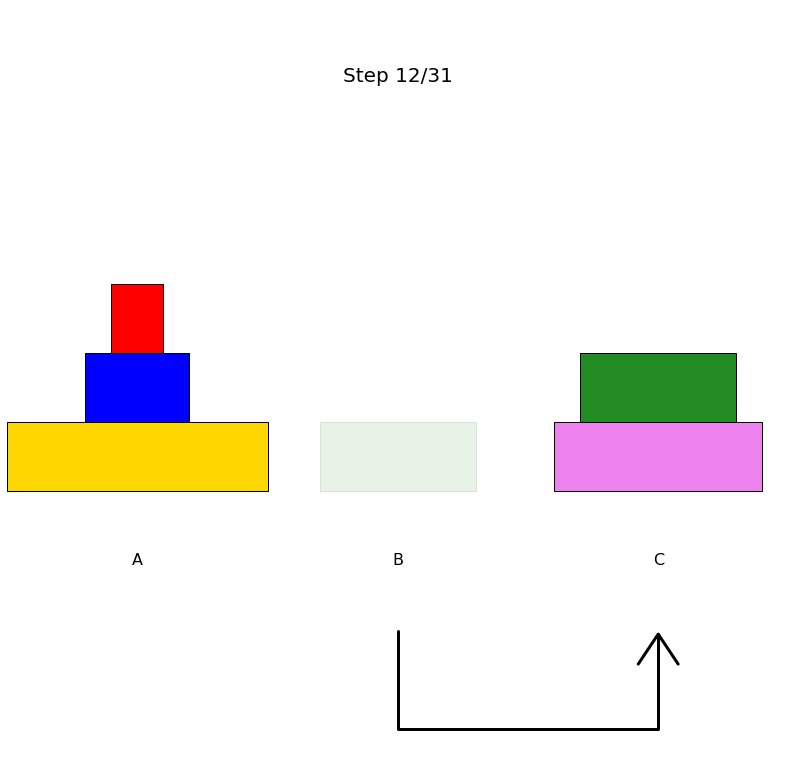

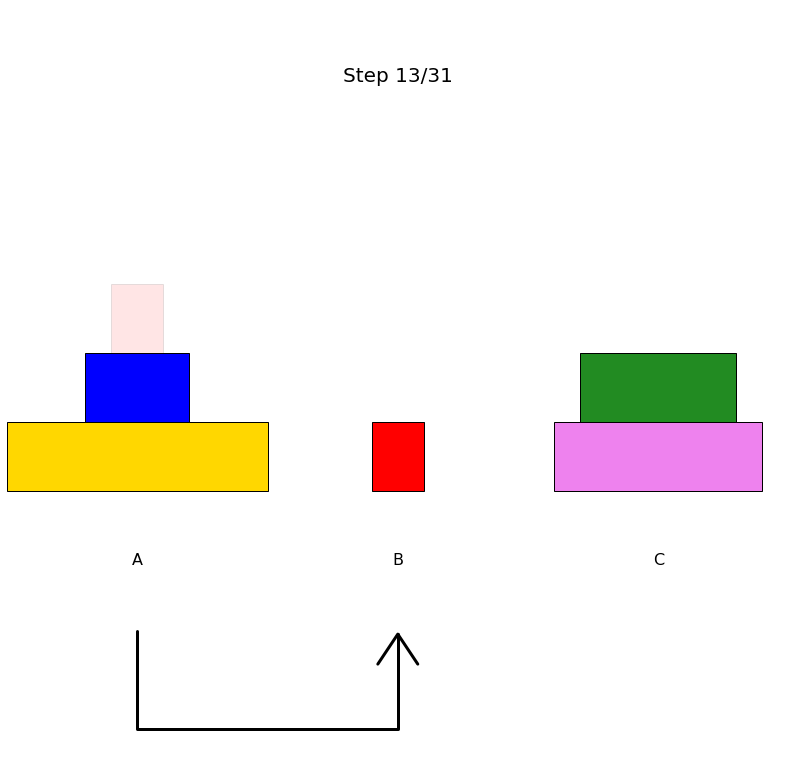

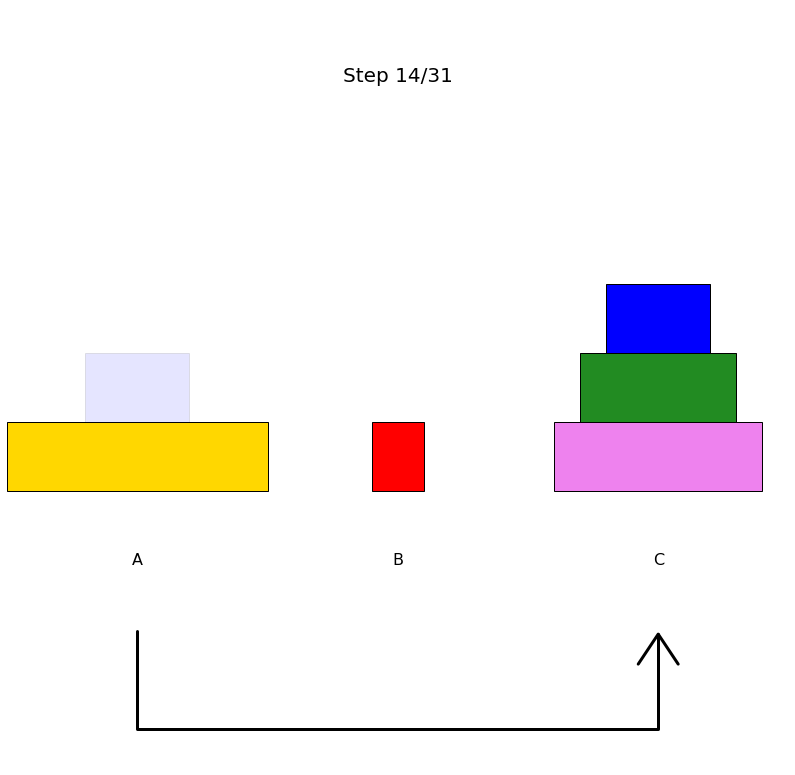

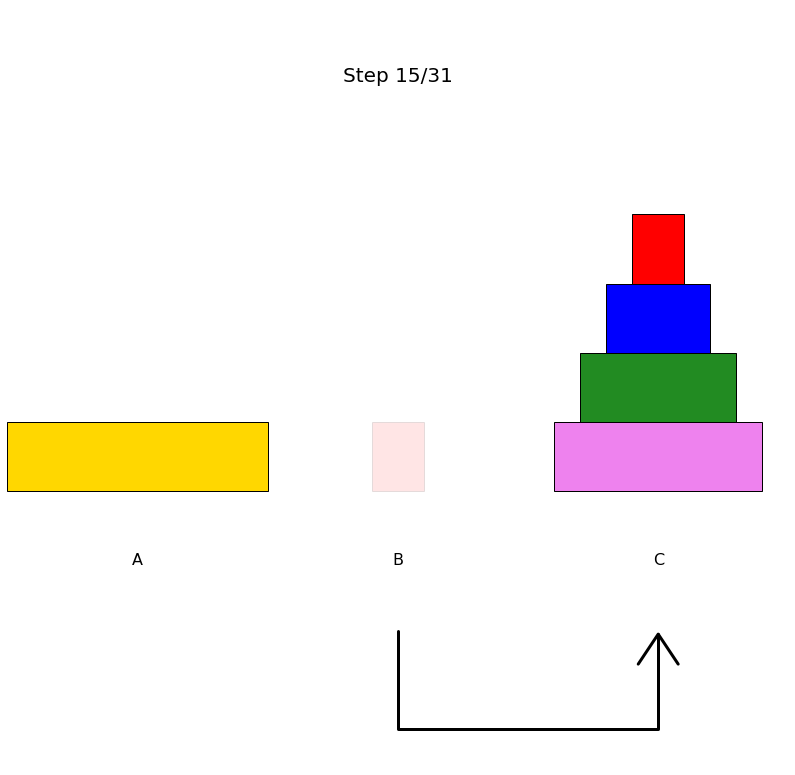

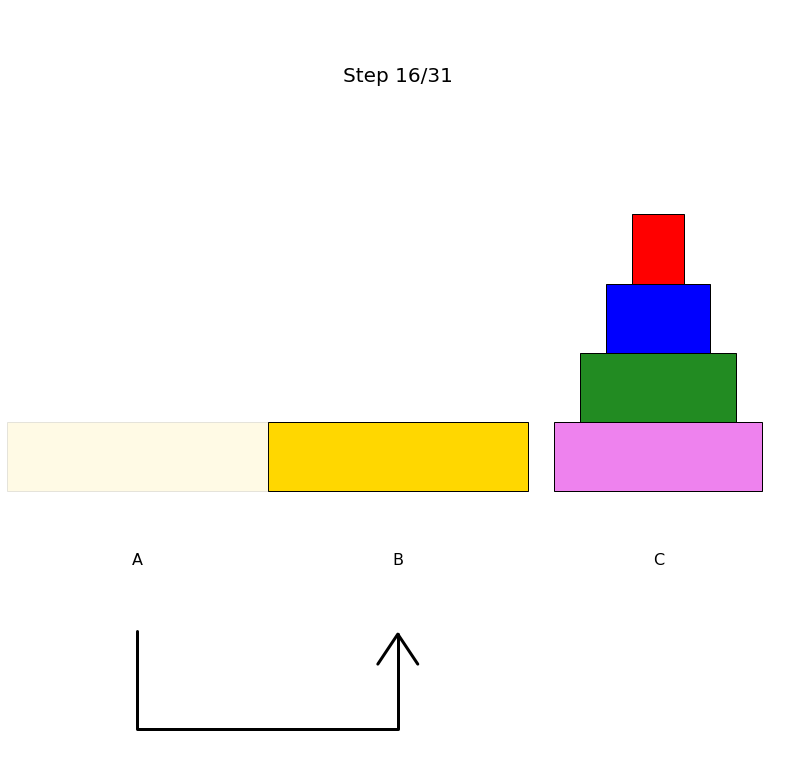

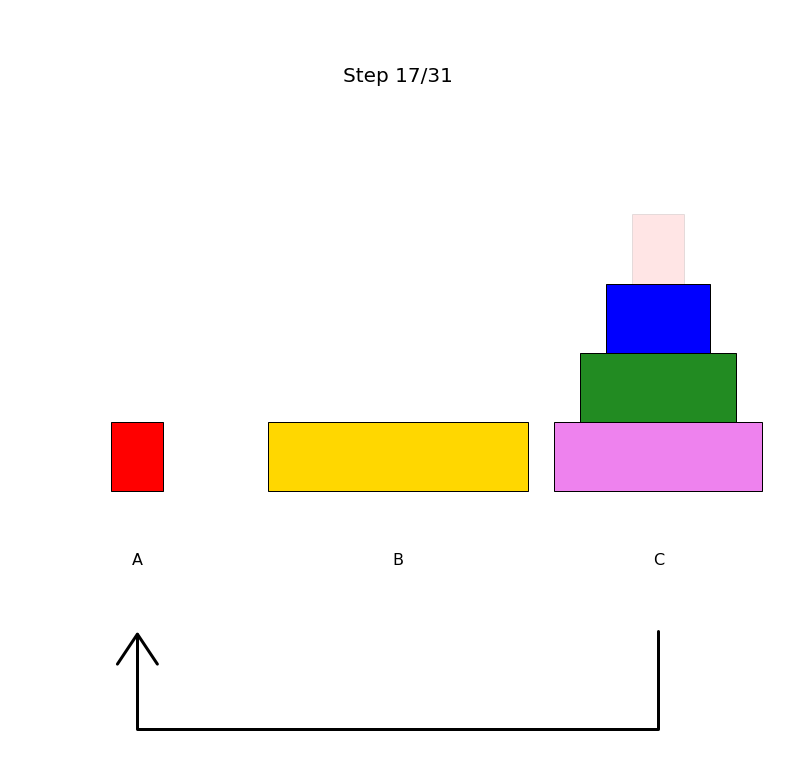

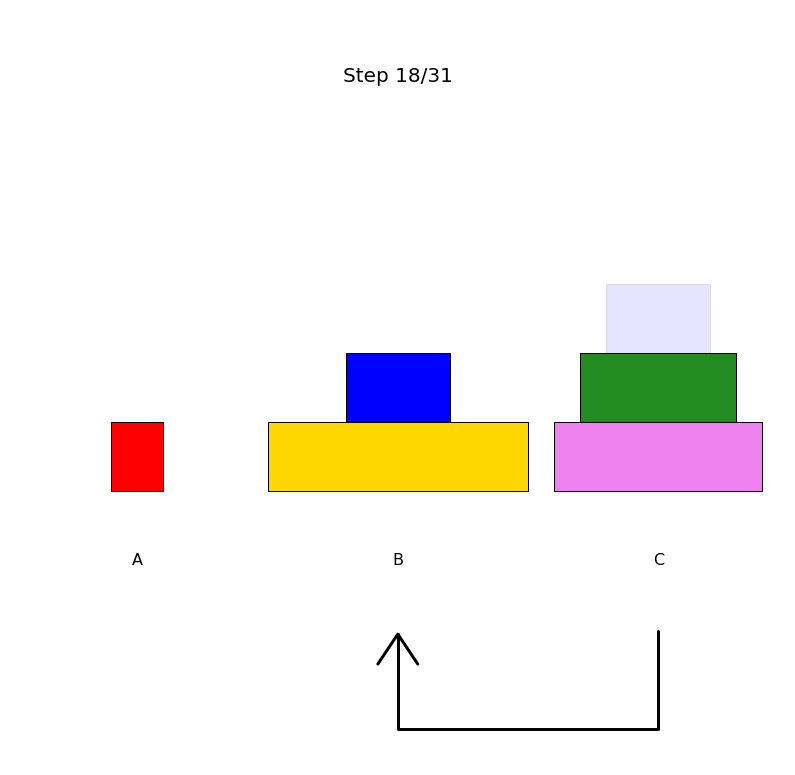

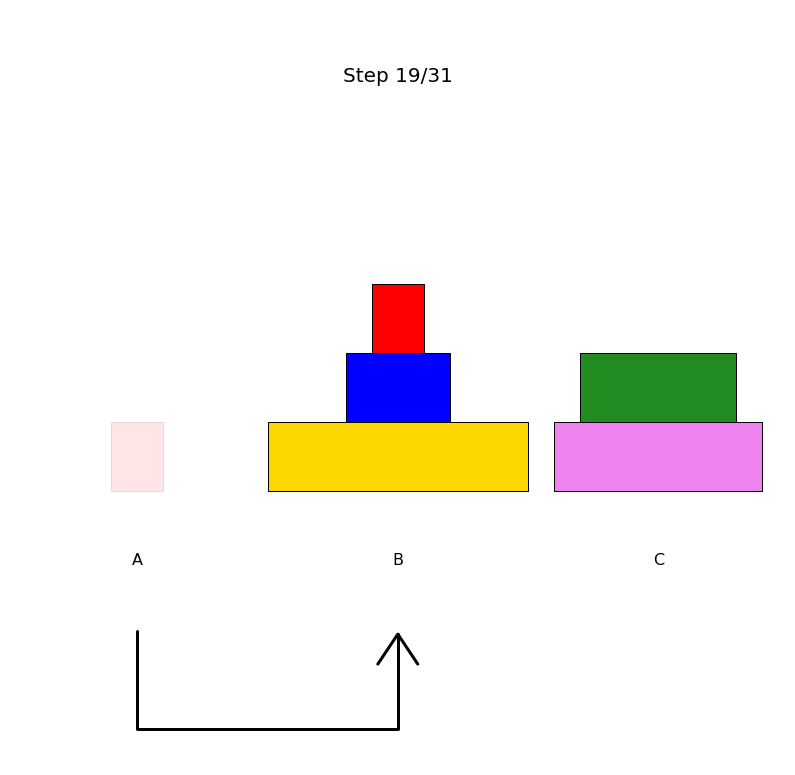

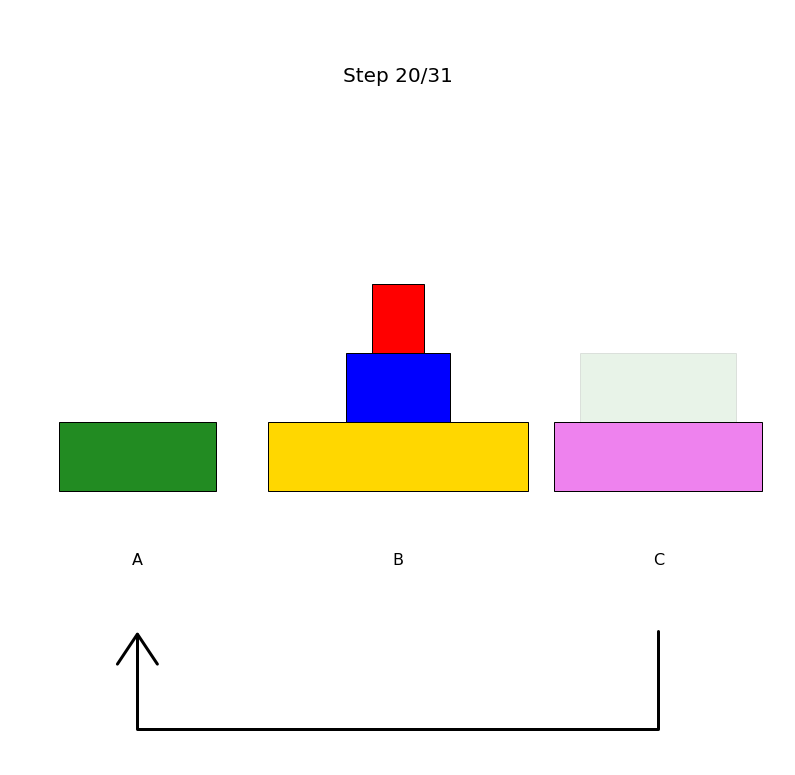

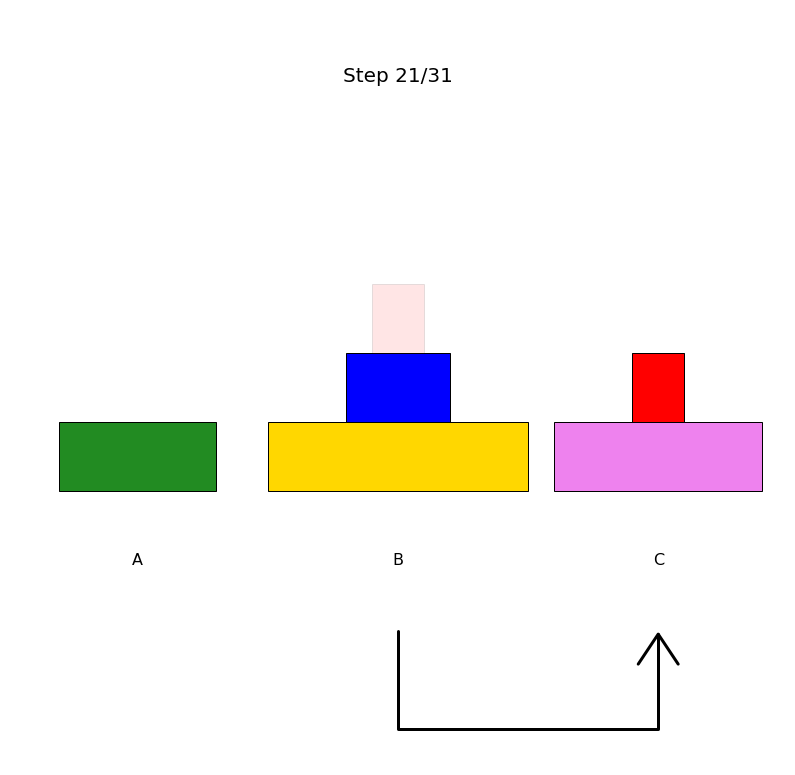

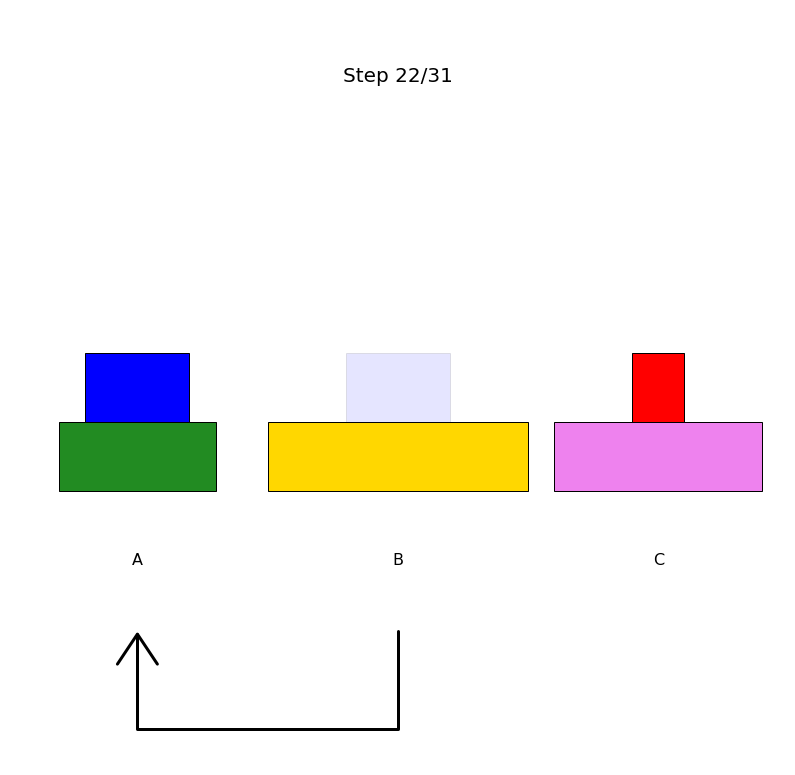

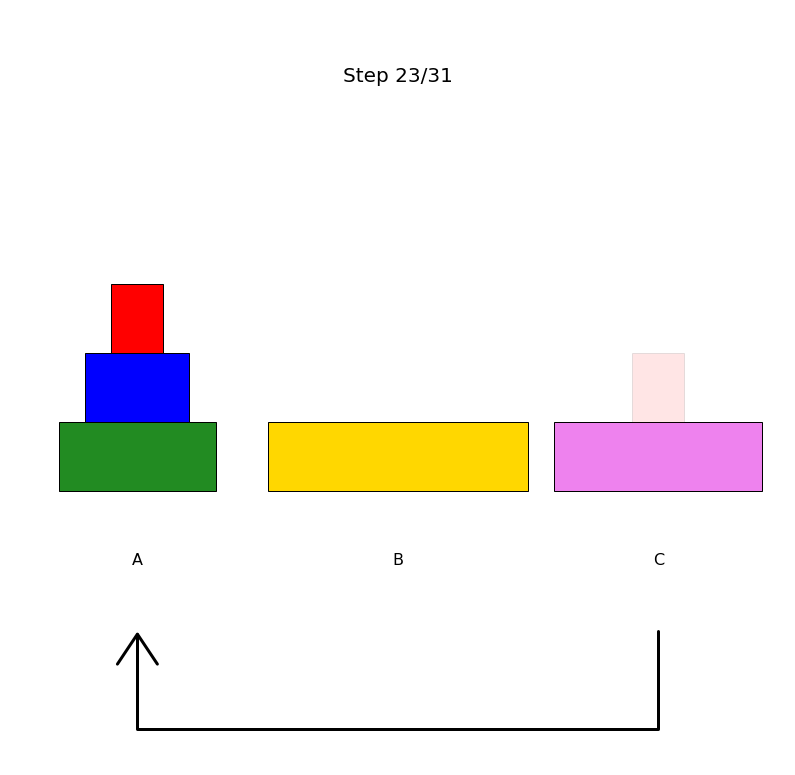

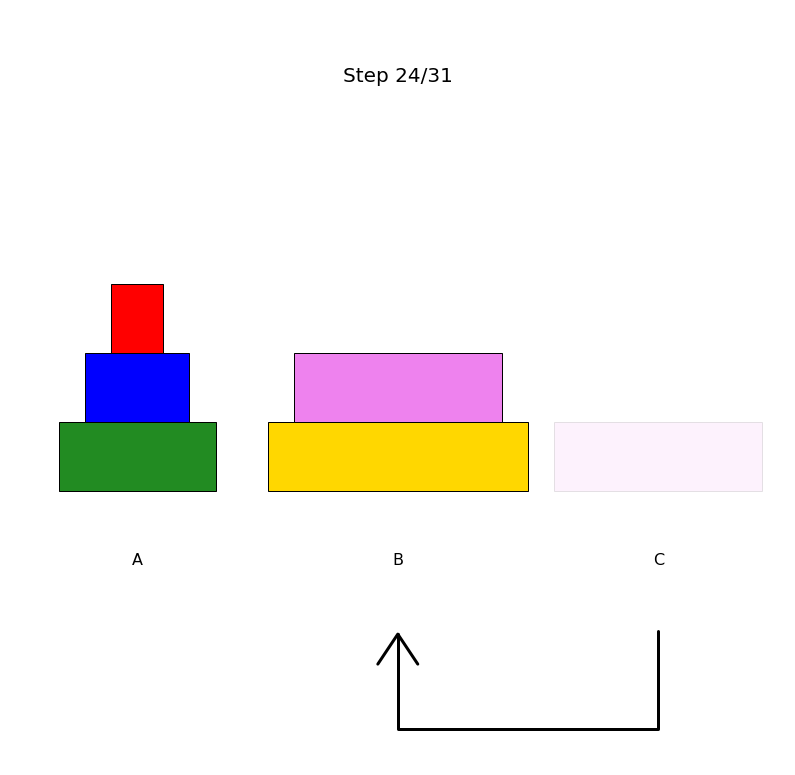

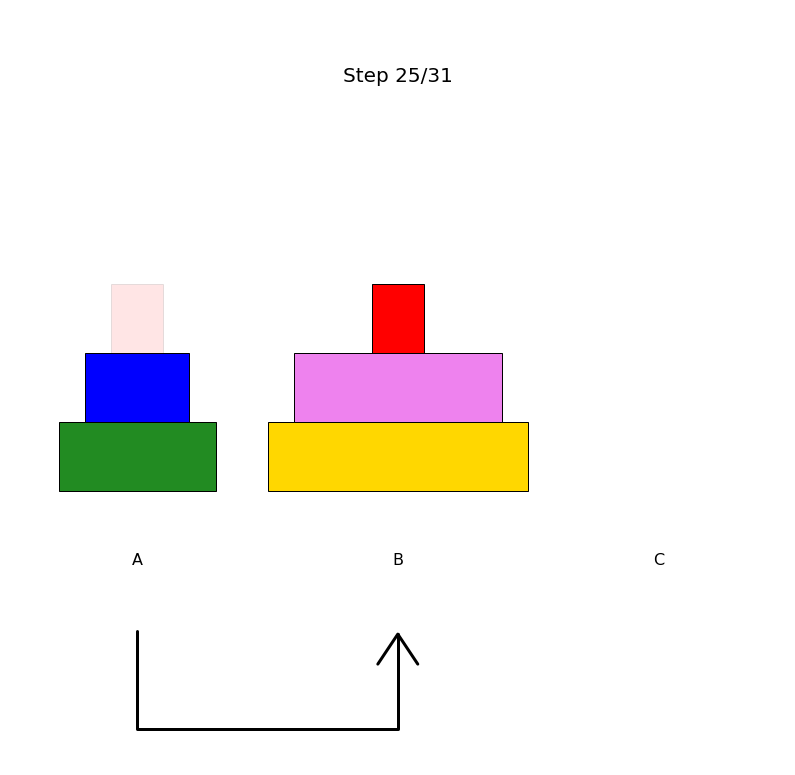

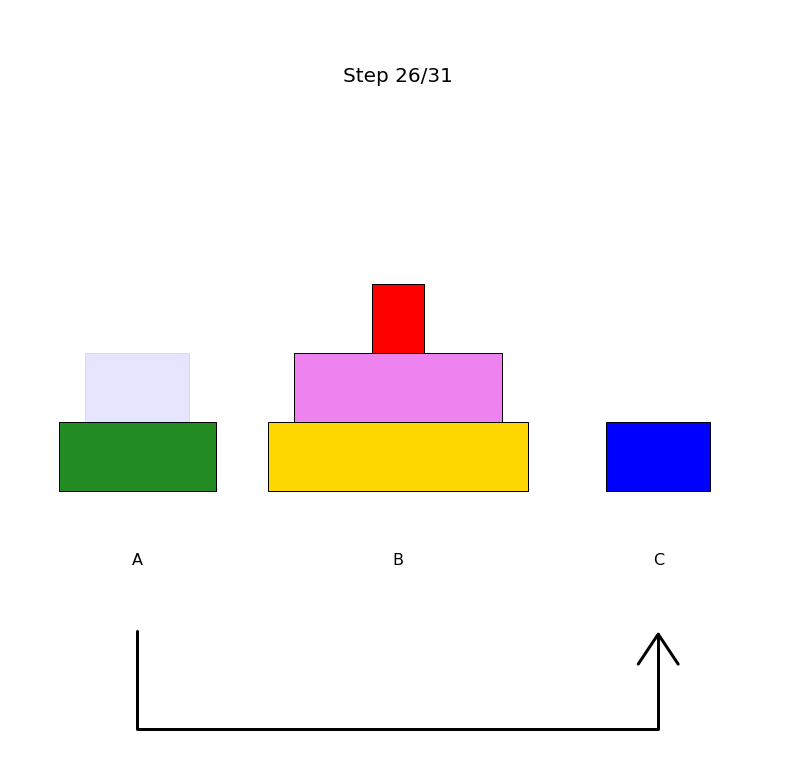

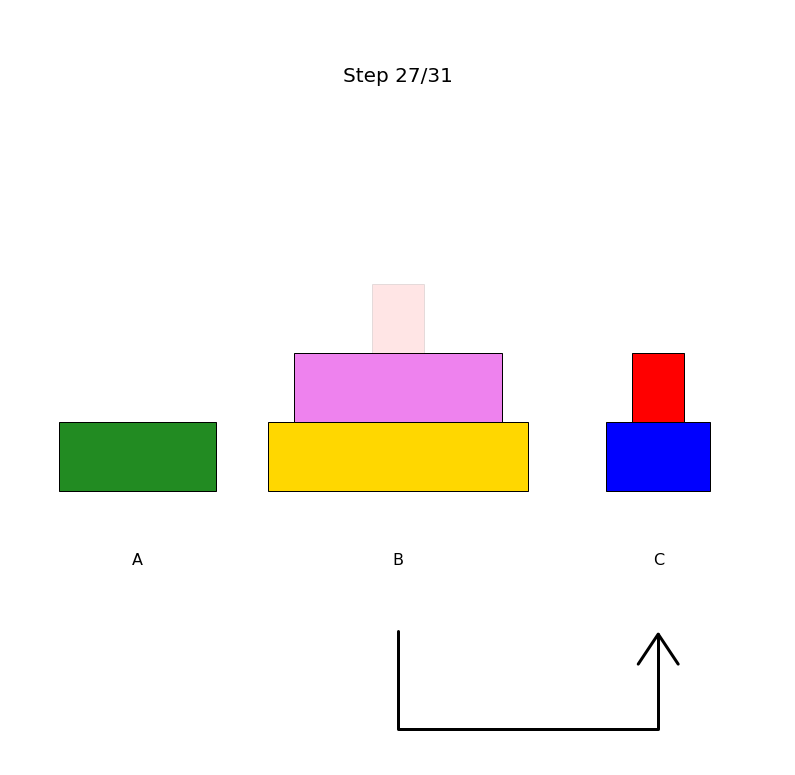

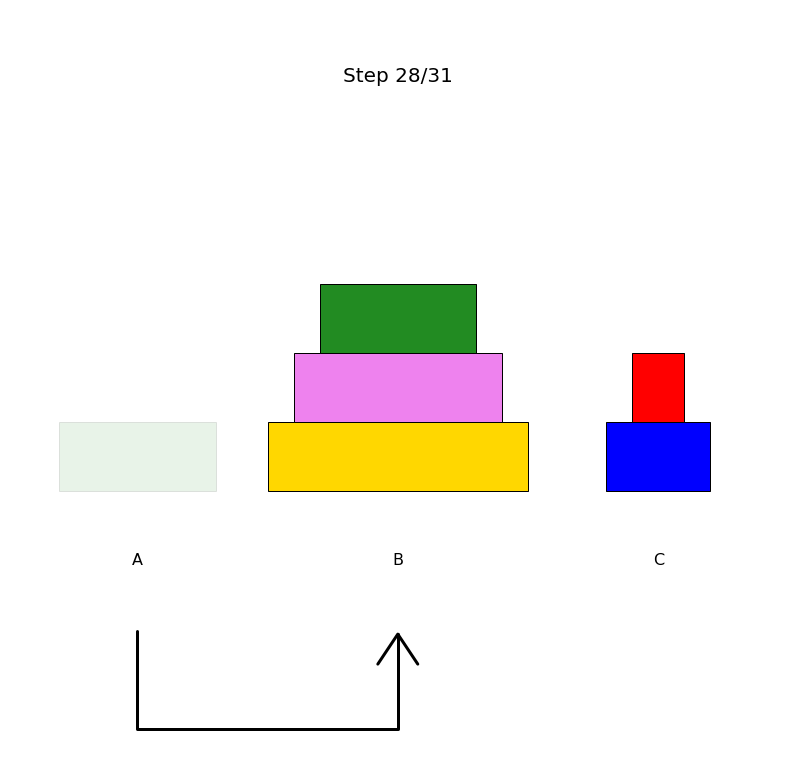

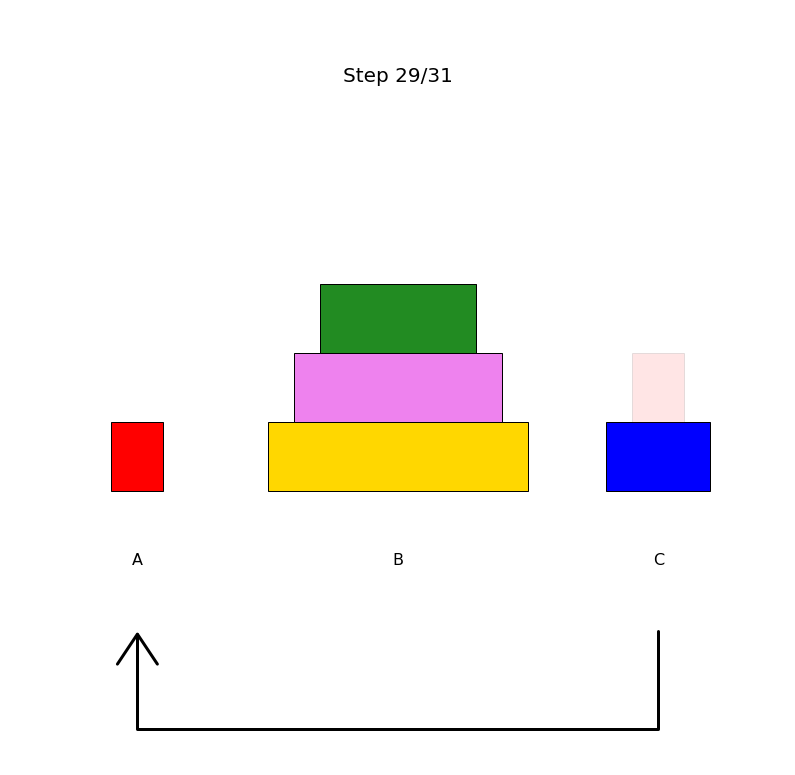

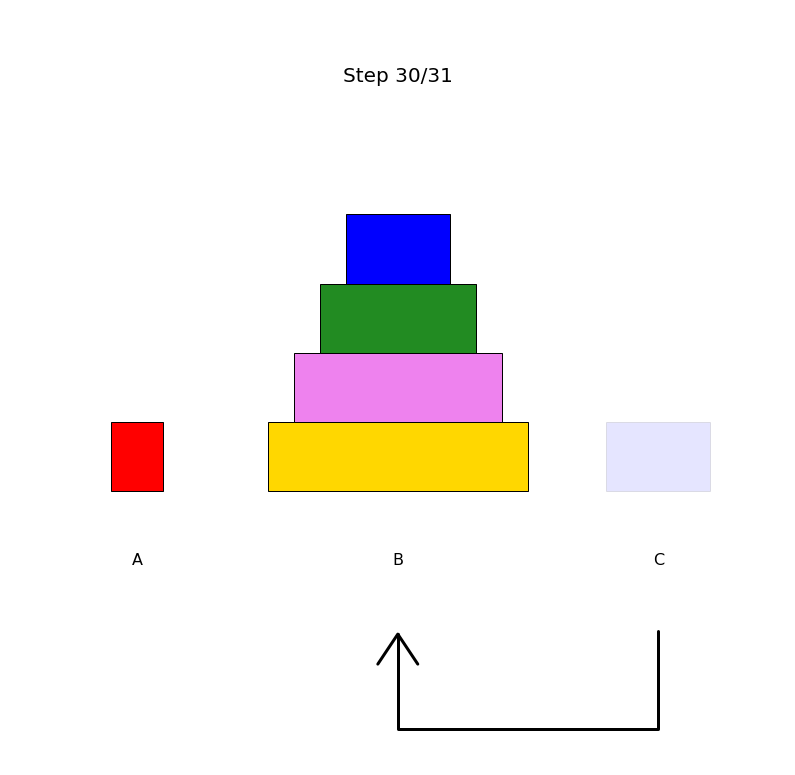

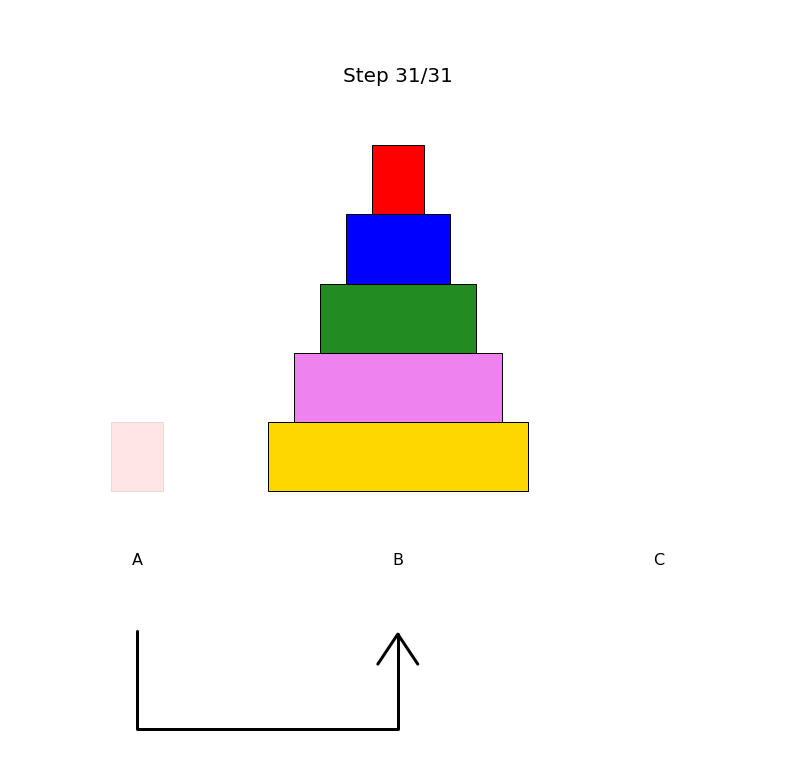

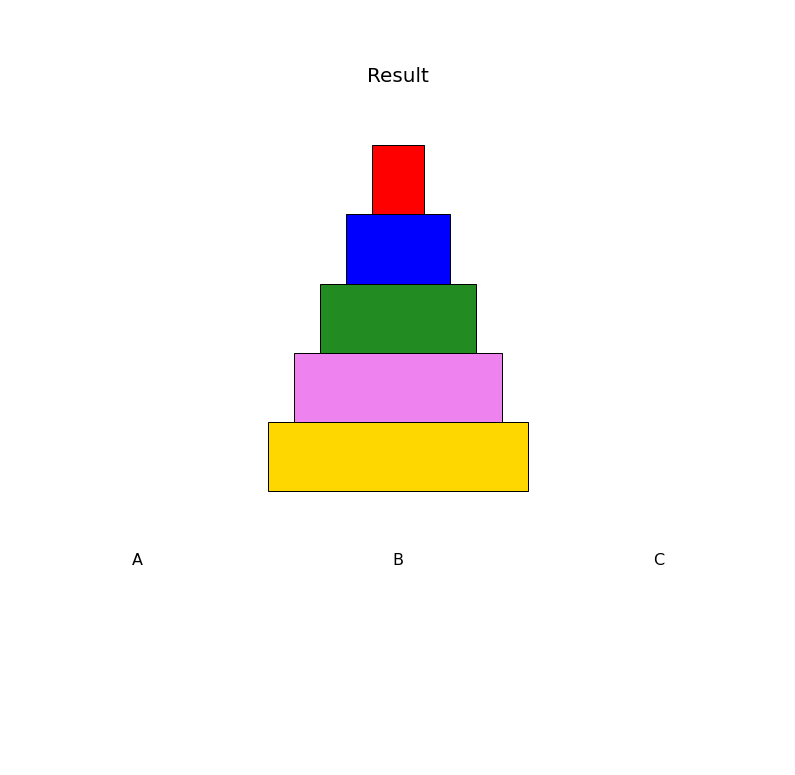

In [13]:
amt_discs = 5
rod_roles = [A, B, C]
call_algorithm(rod_roles)
clear_results()

## Your tests go here

In [14]:
COLOR_OPTION_CHOICE = 1
COL_OPTION_1 = 'green'
COLS_OPTION_3 = ['red', 'blue', 'forestgreen', 'violet', 'gold', 'cyan', 'peru']

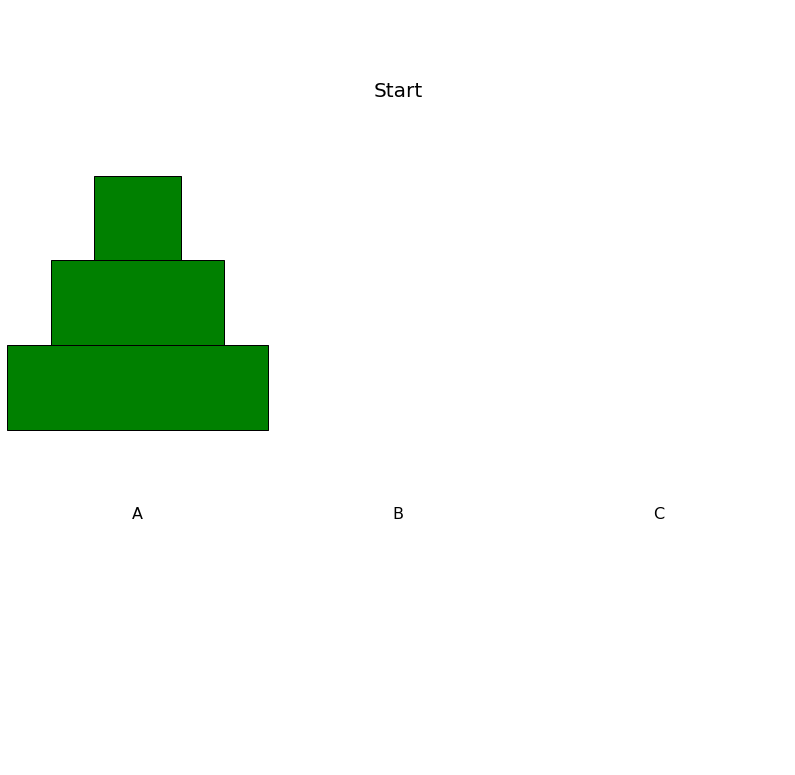

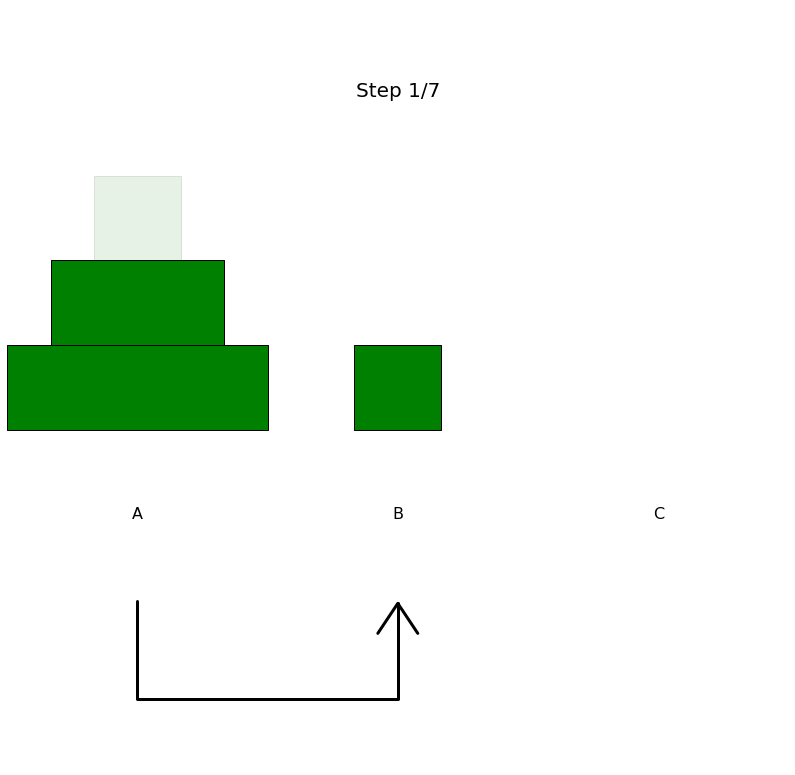

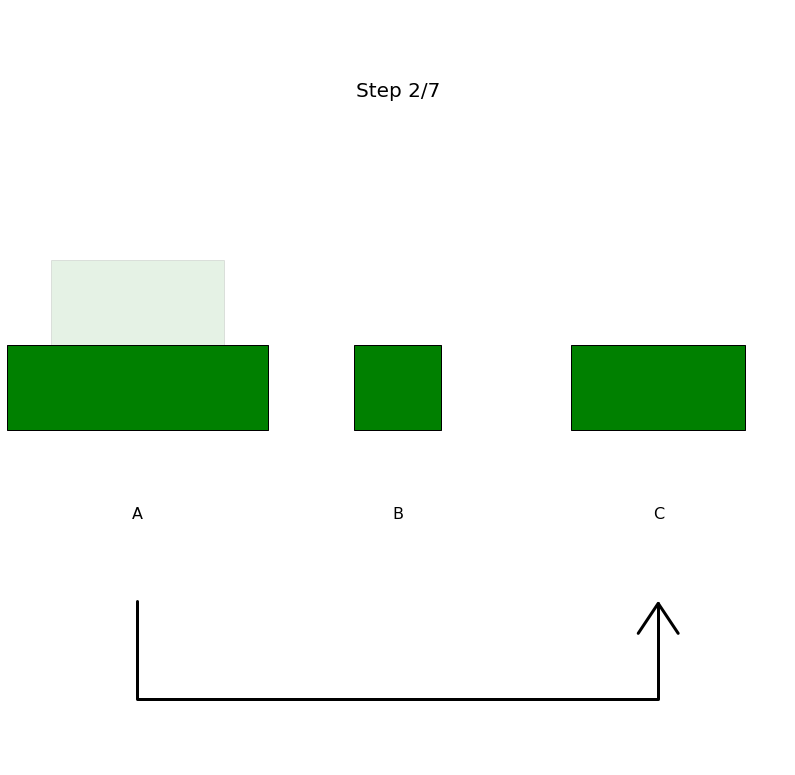

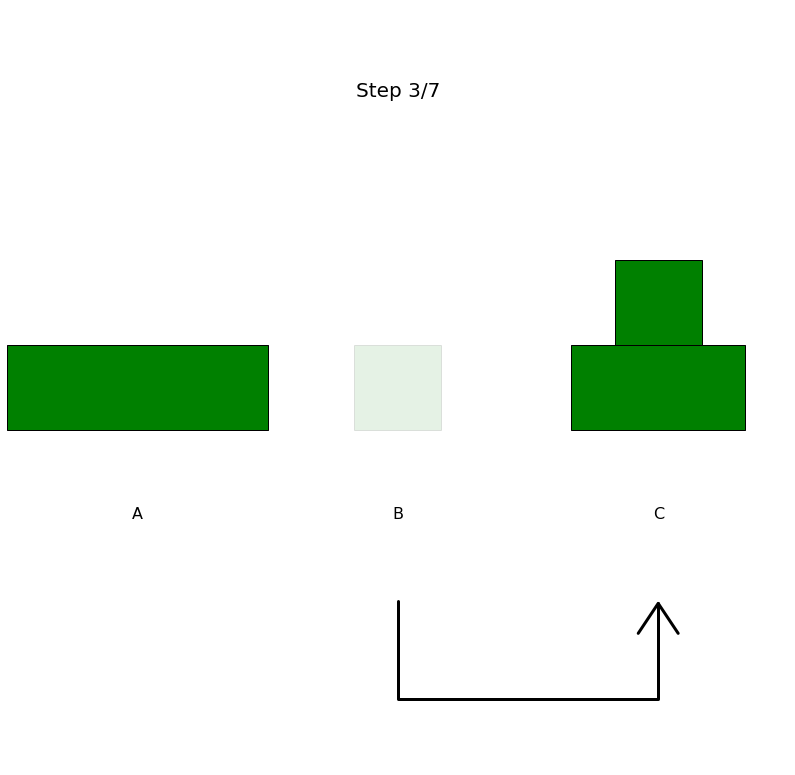

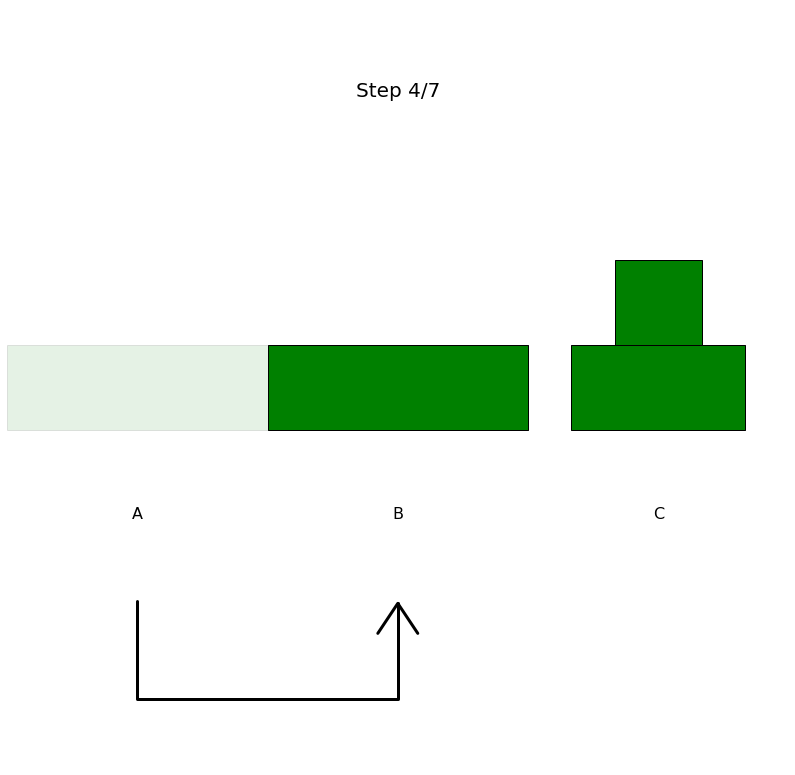

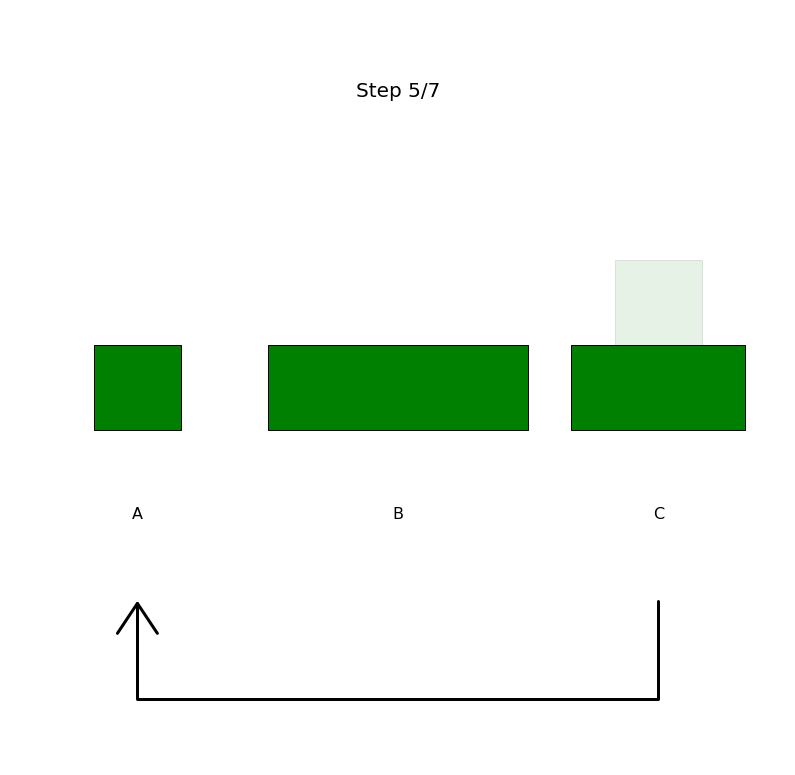

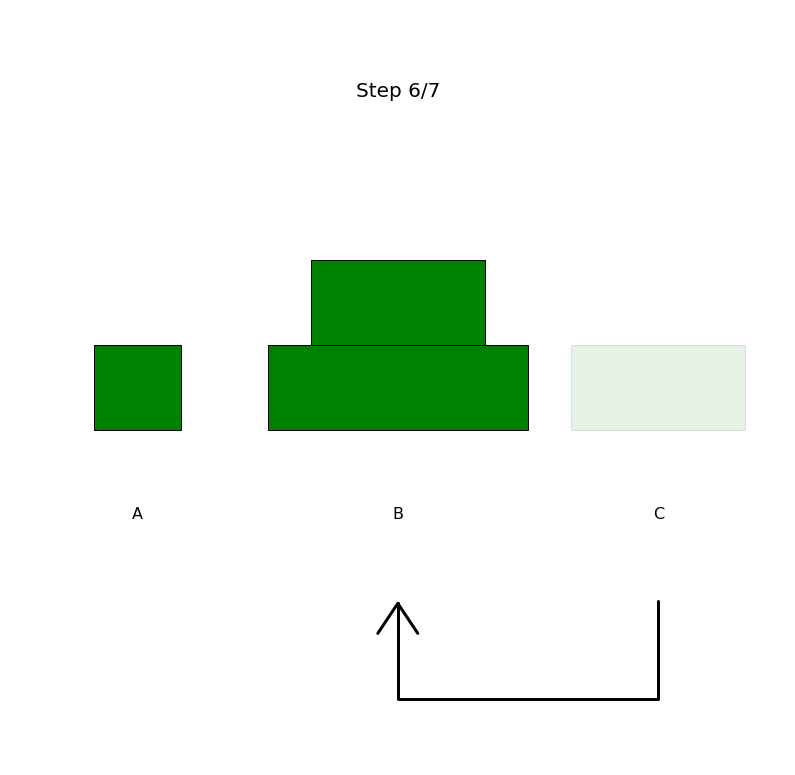

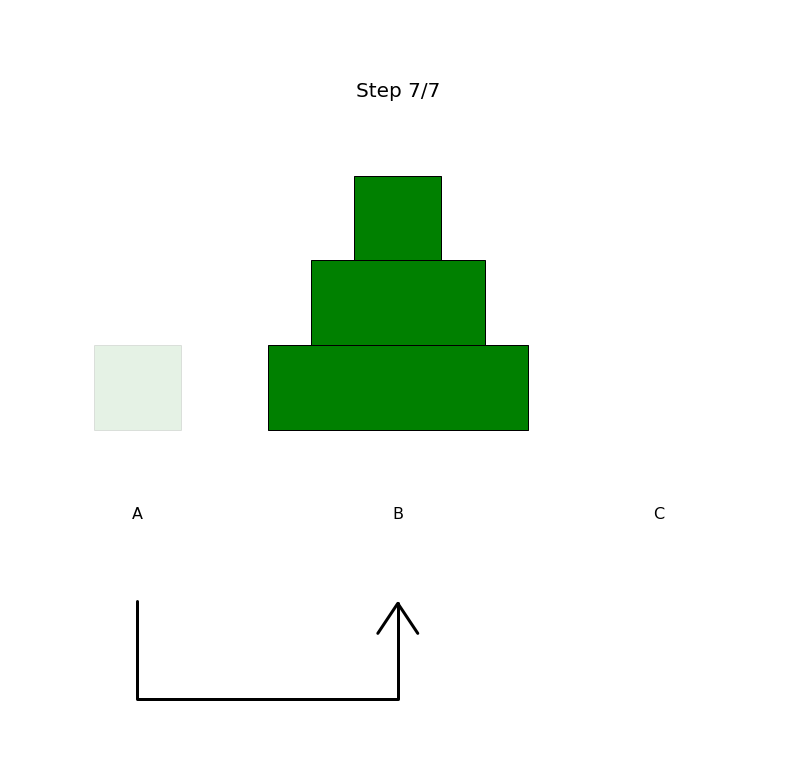

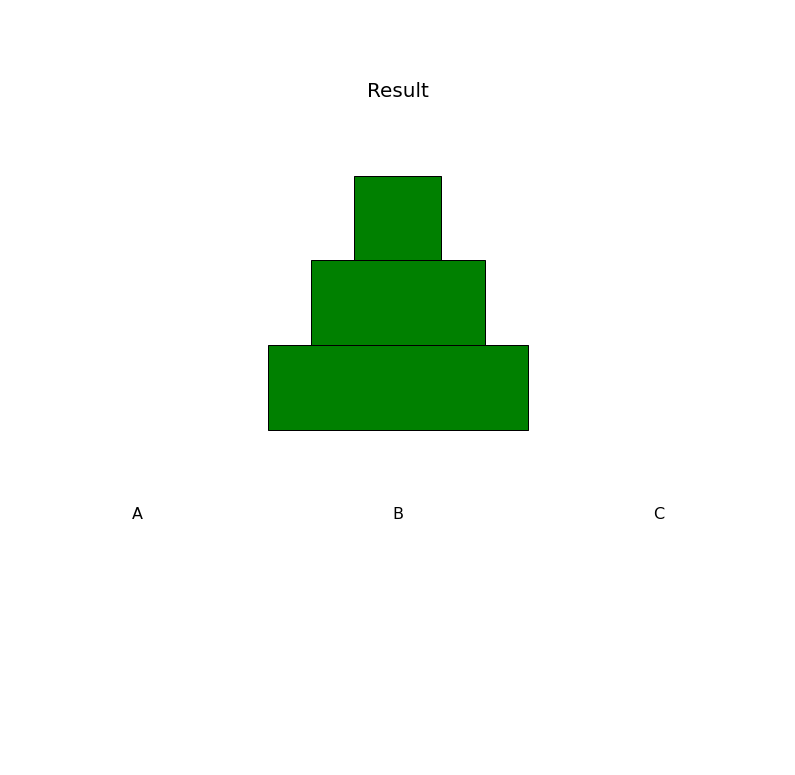

In [15]:
amt_discs = 3
rod_roles = [A, B, C]
call_algorithm(rod_roles)
clear_results()